In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# font 설정
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry~')
import seaborn as sns

# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

# 시도별 데이터

In [2]:
jeju = pd.read_csv('../다콘프로젝트/제주데이터/data_jeju.csv', index_col = 0, parse_dates=['REG_YYMM'])
busan = pd.read_csv('../다콘프로젝트/제주데이터/data_busan.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
chungbuk = pd.read_csv('../다콘프로젝트/제주데이터/data_chungbuk.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
chungnam = pd.read_csv('../다콘프로젝트/제주데이터/data_chungnam.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
daegu = pd.read_csv('../다콘프로젝트/제주데이터/data_daegu.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
daejeon = pd.read_csv('../다콘프로젝트/제주데이터/data_daejeon.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
gangwon = pd.read_csv('../다콘프로젝트/제주데이터/data_gangwon.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
gwangju = pd.read_csv('../다콘프로젝트/제주데이터/data_gwangju.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
gyeongbuk = pd.read_csv('../다콘프로젝트/제주데이터/data_gyeongbuk.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])

In [3]:
gyeongi = pd.read_csv('../다콘프로젝트/제주데이터/data_gyeongi.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
gyeongnam = pd.read_csv('../다콘프로젝트/제주데이터/data_gyeongnam.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
incheon = pd.read_csv('../다콘프로젝트/제주데이터/data_incheon.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
jeonbuk = pd.read_csv('../다콘프로젝트/제주데이터/data_jeonbuk.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
jeonnam = pd.read_csv('../다콘프로젝트/제주데이터/data_jeonnam.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
sejong = pd.read_csv('../다콘프로젝트/제주데이터/data_sejong.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
seoul = pd.read_csv('../다콘프로젝트/제주데이터/data_seoul.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
ulsan = pd.read_csv('../다콘프로젝트/제주데이터/data_ulsan.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])

In [4]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [5]:
# 컬럼 드랍용 함수
def dropcol(data,a,b,c,d):
    data = data.drop([a, b, c, d], inplace=True, axis=1)

# AMT/CMT 생성 함수
def amtcnt(data,a, b) :
    data['AMT/CNT'] = data[a] / data[b]

# 그래프 뽑기위한 피봇테이블 생성 함수
def pivotT(data, a, b, c, d) :
    data_pivot = data.pivot_table(index=[a], values=[b], columns=[c, d], aggfunc=np.mean)
    return data_pivot

In [6]:
# 제주 날짜 처리
jeju['year'] = jeju['REG_YYMM'].apply(lambda x: grap_year(x))
jeju['month'] = jeju['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(jeju, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(jeju,'AMT', 'CNT')
jeju_pivot = pivotT(jeju, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [7]:
# busan 날짜 처리
busan['year'] = busan['REG_YYMM'].apply(lambda x: grap_year(x))
busan['month'] = busan['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(busan, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(busan,'AMT', 'CNT')
busan_pivot = pivotT(busan, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [8]:
# chungbuk 날짜 처리
chungbuk['year'] = chungbuk['REG_YYMM'].apply(lambda x: grap_year(x))
chungbuk['month'] = chungbuk['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(chungbuk, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(chungbuk,'AMT', 'CNT')
chungbuk_pivot = pivotT(chungbuk, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [9]:
# chungnam 날짜 처리
chungnam['year'] = chungnam['REG_YYMM'].apply(lambda x: grap_year(x))
chungnam['month'] = chungnam['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(chungnam, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(chungnam,'AMT', 'CNT')
chungnam_pivot = pivotT(chungnam, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [10]:
# daegu 날짜 처리
daegu['year'] = daegu['REG_YYMM'].apply(lambda x: grap_year(x))
daegu['month'] = daegu['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(daegu, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(daegu,'AMT', 'CNT')
daegu_pivot = pivotT(daegu, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [11]:
# daejeon 날짜 처리
daejeon['year'] = daejeon['REG_YYMM'].apply(lambda x: grap_year(x))
daejeon['month'] = daejeon['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(daejeon, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(daejeon,'AMT', 'CNT')
daejeon_pivot = pivotT(daejeon, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [12]:
# gangwon 날짜 처리
gangwon['year'] = gangwon['REG_YYMM'].apply(lambda x: grap_year(x))
gangwon['month'] = gangwon['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(gangwon, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(gangwon,'AMT', 'CNT')
gangwon_pivot = pivotT(gangwon, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [13]:
# daejeon 날짜 처리
gwangju['year'] = gwangju['REG_YYMM'].apply(lambda x: grap_year(x))
gwangju['month'] = gwangju['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(gwangju, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(gwangju,'AMT', 'CNT')
gwangju_pivot = pivotT(gwangju, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [14]:
# gyeongbuk 날짜 처리
gyeongbuk['year'] = gyeongbuk['REG_YYMM'].apply(lambda x: grap_year(x))
gyeongbuk['month'] = gyeongbuk['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(gyeongbuk, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(gyeongbuk,'AMT', 'CNT')
gyeongbuk_pivot = pivotT(gyeongbuk, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [15]:
# gyeongi날짜 처리
gyeongi['year'] = gyeongi['REG_YYMM'].apply(lambda x: grap_year(x))
gyeongi['month'] = gyeongi['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(gyeongi, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(gyeongi,'AMT', 'CNT')
gyeongi_pivot = pivotT(gyeongi, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [16]:
# gyeongnam날짜 처리
gyeongnam['year'] = gyeongnam['REG_YYMM'].apply(lambda x: grap_year(x))
gyeongnam['month'] = gyeongnam['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(gyeongnam, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(gyeongnam,'AMT', 'CNT')
gyeongnam_pivot = pivotT(gyeongnam, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [17]:
# incheon 날짜 처리
incheon['year'] = incheon['REG_YYMM'].apply(lambda x: grap_year(x))
incheon['month'] = incheon['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(incheon, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(incheon,'AMT', 'CNT')
incheon_pivot = pivotT(incheon, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [18]:
# jeonbuk 날짜 처리
jeonbuk['year'] = jeonbuk['REG_YYMM'].apply(lambda x: grap_year(x))
jeonbuk['month'] = jeonbuk['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(jeonbuk, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(jeonbuk,'AMT', 'CNT')
jeonbuk_pivot = pivotT(jeonbuk, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [19]:
# jeonnam 날짜 처리
jeonnam['year'] = jeonnam['REG_YYMM'].apply(lambda x: grap_year(x))
jeonnam['month'] = jeonnam['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(jeonnam, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(jeonnam,'AMT', 'CNT')
jeonnam_pivot = pivotT(jeonnam, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [20]:
# sejong 날짜 처리
sejong['year'] = sejong['REG_YYMM'].apply(lambda x: grap_year(x))
sejong['month'] = sejong['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(sejong, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(sejong,'AMT', 'CNT')
sejong_pivot = pivotT(sejong, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [21]:
# seoul 날짜 처리
seoul['year'] = seoul['REG_YYMM'].apply(lambda x: grap_year(x))
seoul['month'] = seoul['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(seoul, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(seoul,'AMT', 'CNT')
seoul_pivot = pivotT(seoul, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

In [22]:
# ulsan 날짜 처리
ulsan['year'] = ulsan['REG_YYMM'].apply(lambda x: grap_year(x))
ulsan['month'] = ulsan['REG_YYMM'].apply(lambda x: grap_month(x))

# 필요없는 컬럼 드랍
dropcol(ulsan, 'REG_YYMM', 'CARD_CCG_NM', 'HOM_SIDO_NM', 'HOM_CCG_NM')

# AMT에 CNT를 나눈 컬럼 생성
amtcnt(ulsan,'AMT', 'CNT')
ulsan_pivot = pivotT(ulsan, 'STD_CLSS_NM', 'AMT/CNT', 'year', 'month')

# 이용건수 별 AMT. 2019년 2020년 차이 알아보기

In [23]:
def barChar(data) :
    for i in range(1,4) :
        data.iloc[:,[i-1, 11+i]].plot(kind='bar', figsize=(15,15))
        plt.title('2019년 %d월 2020년 %d월 업종별 이용건당 AMT' %(i,i))

# 부산

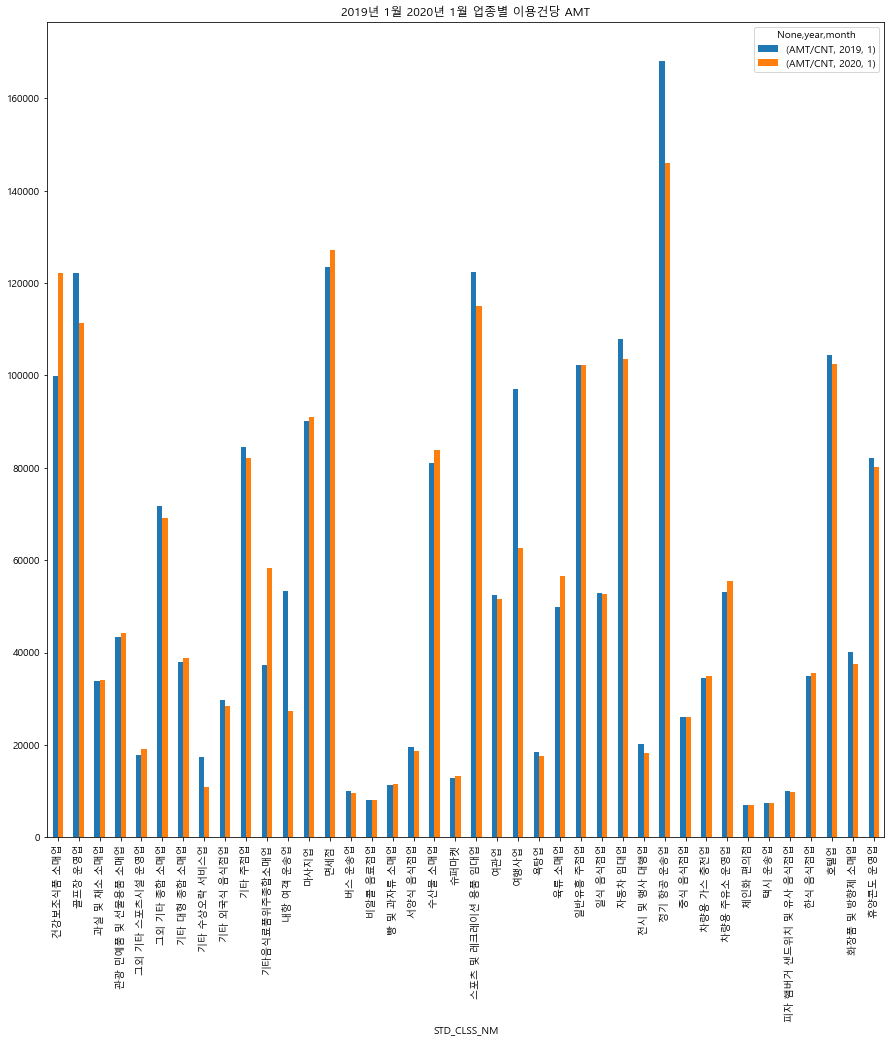

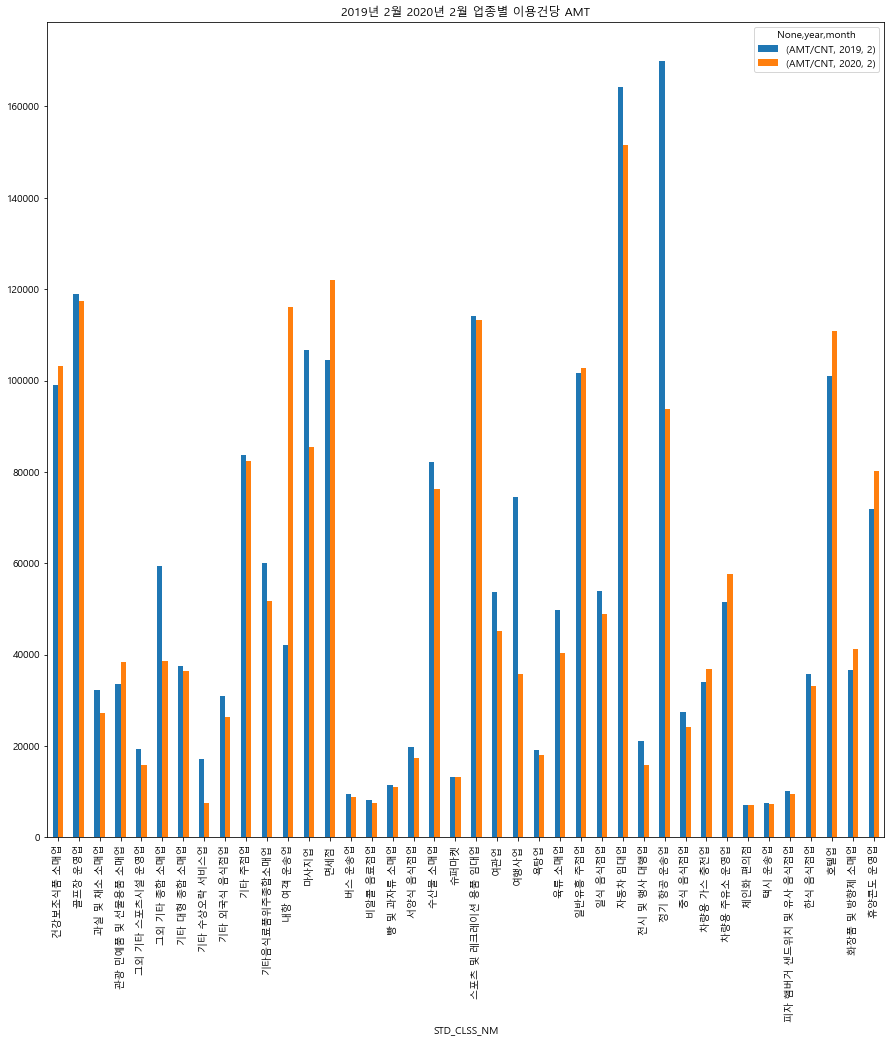

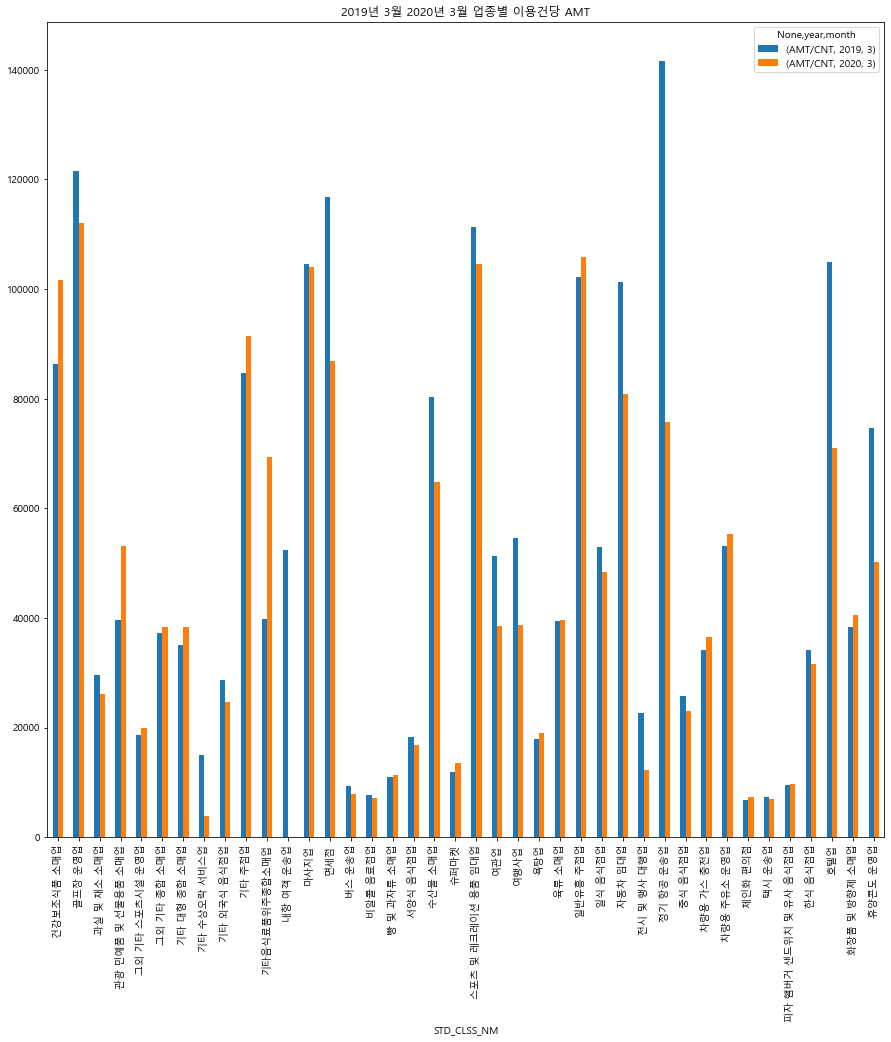

In [24]:
barChar(busan_pivot) 

# 충북

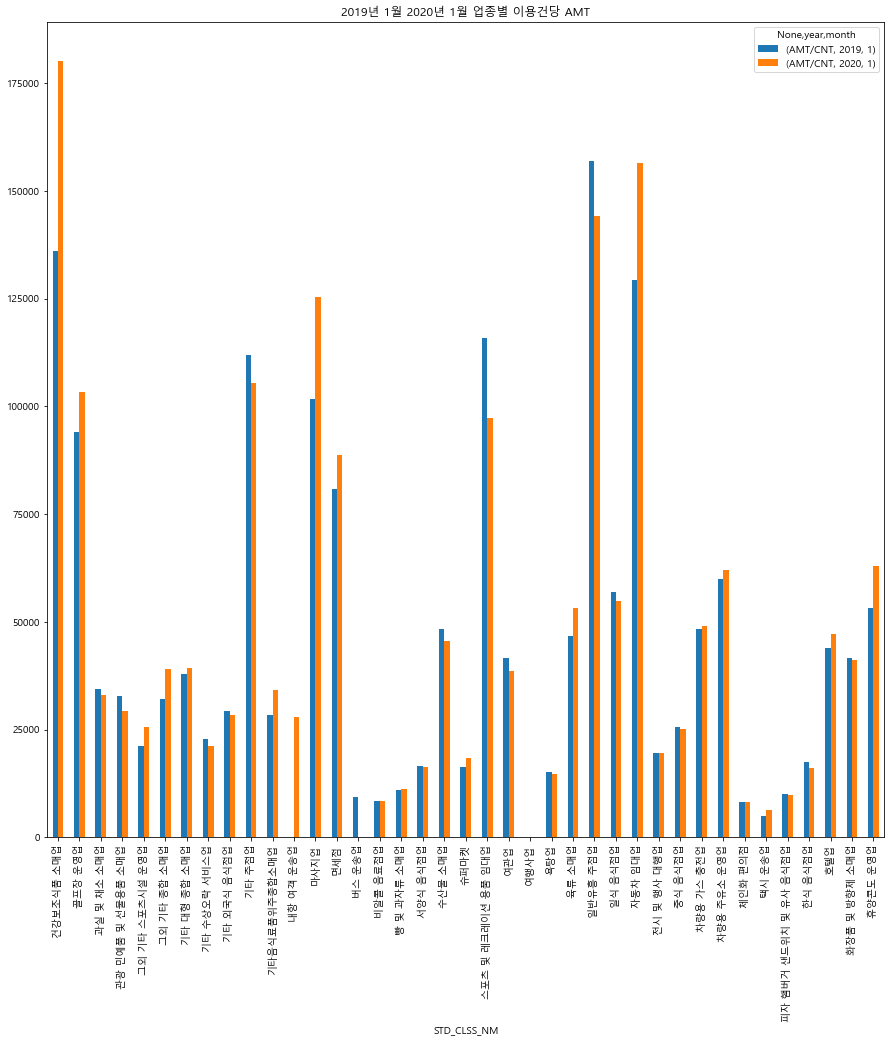

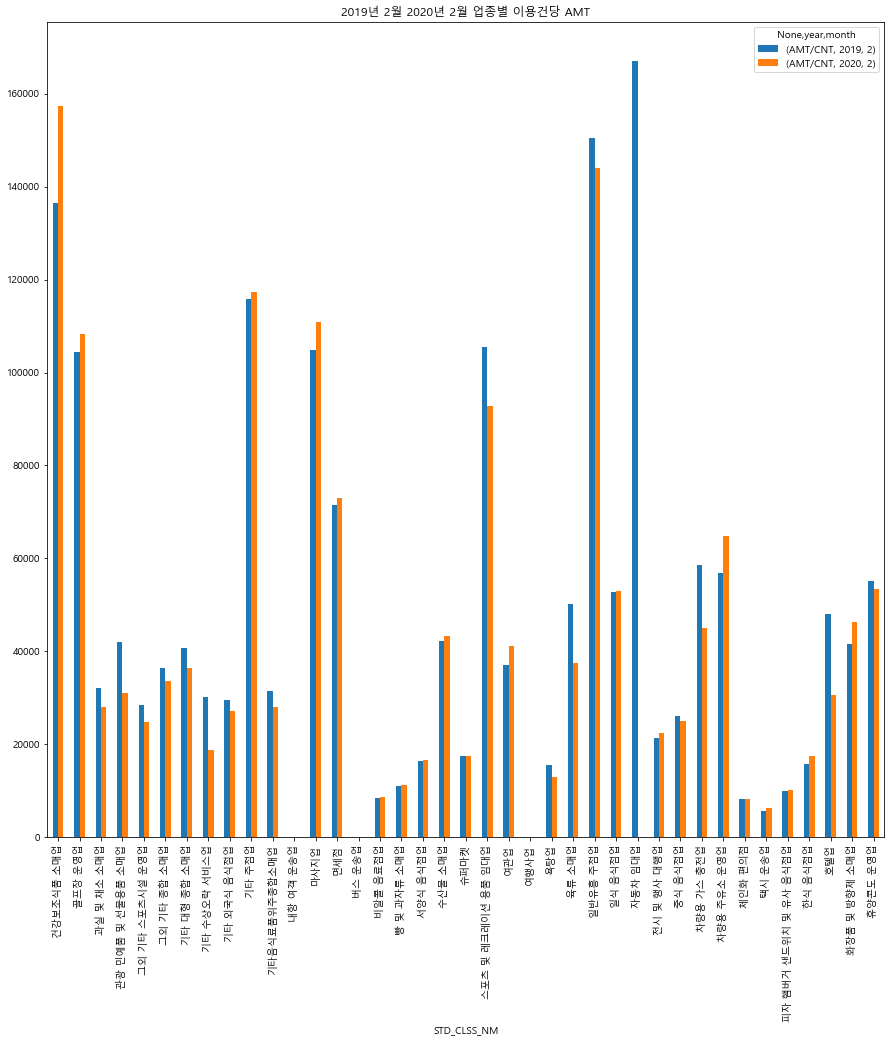

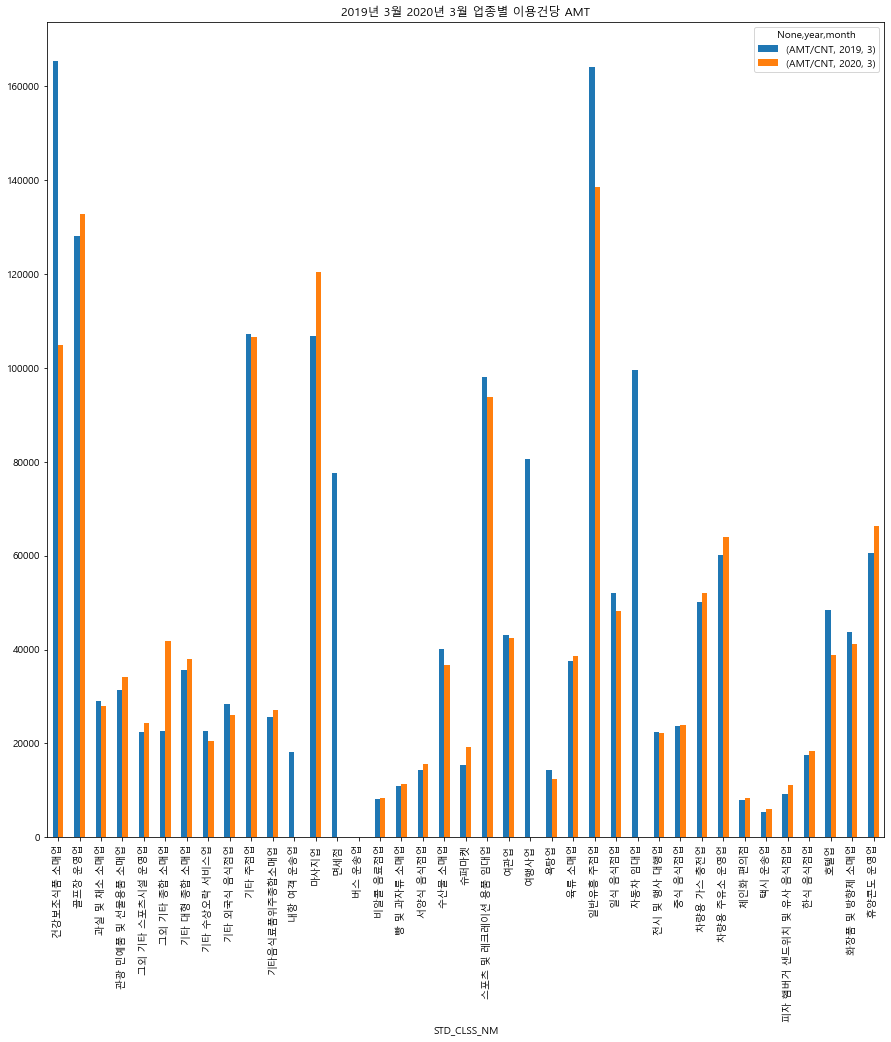

In [25]:
barChar(chungbuk_pivot)

# 충남

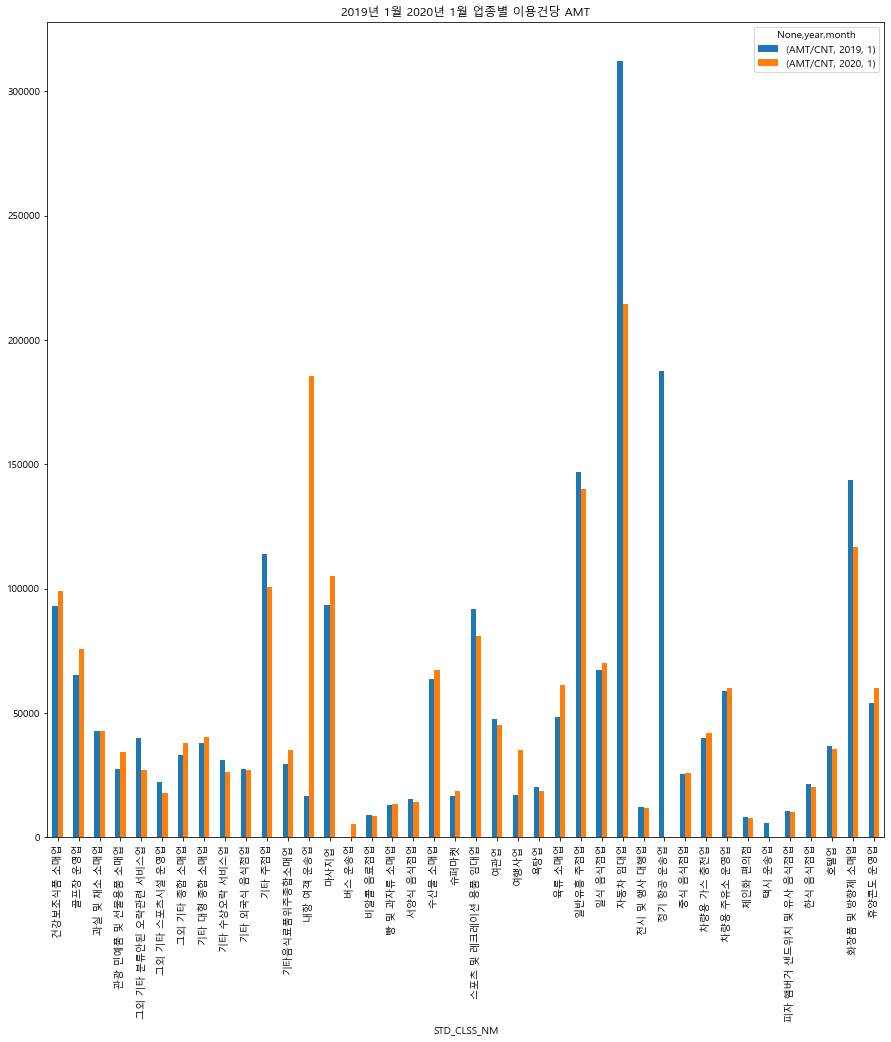

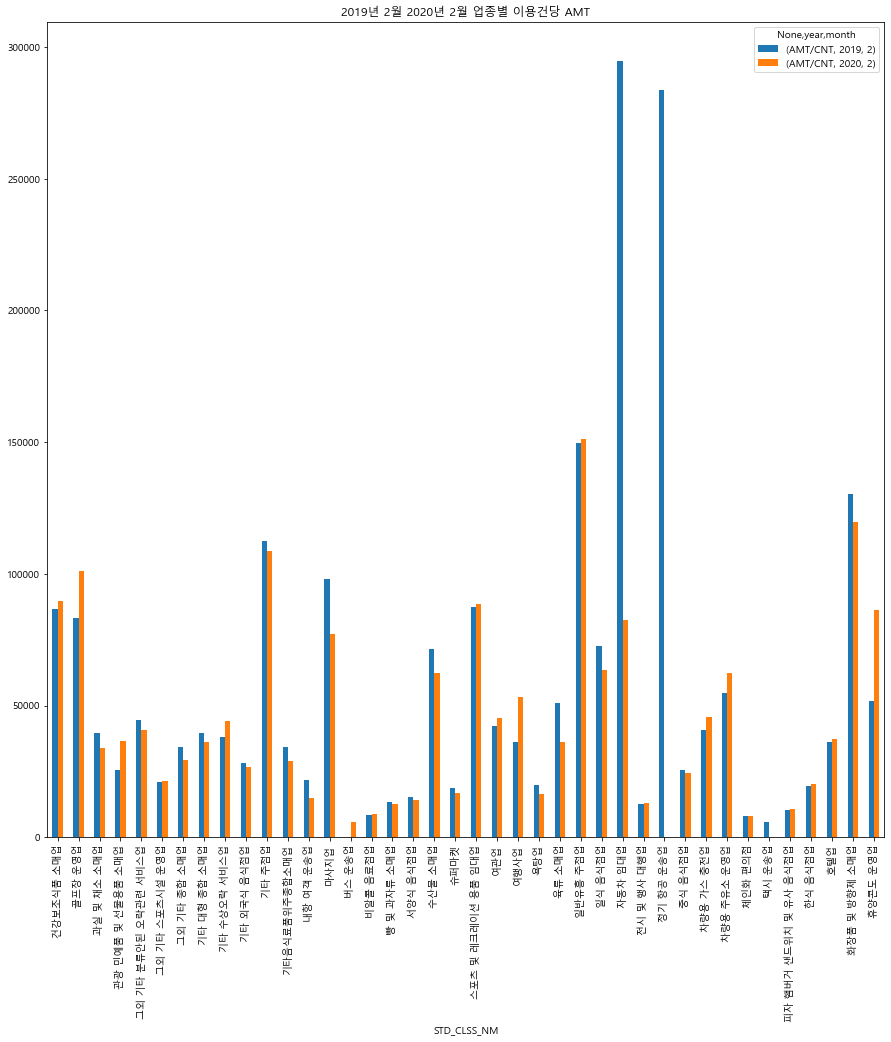

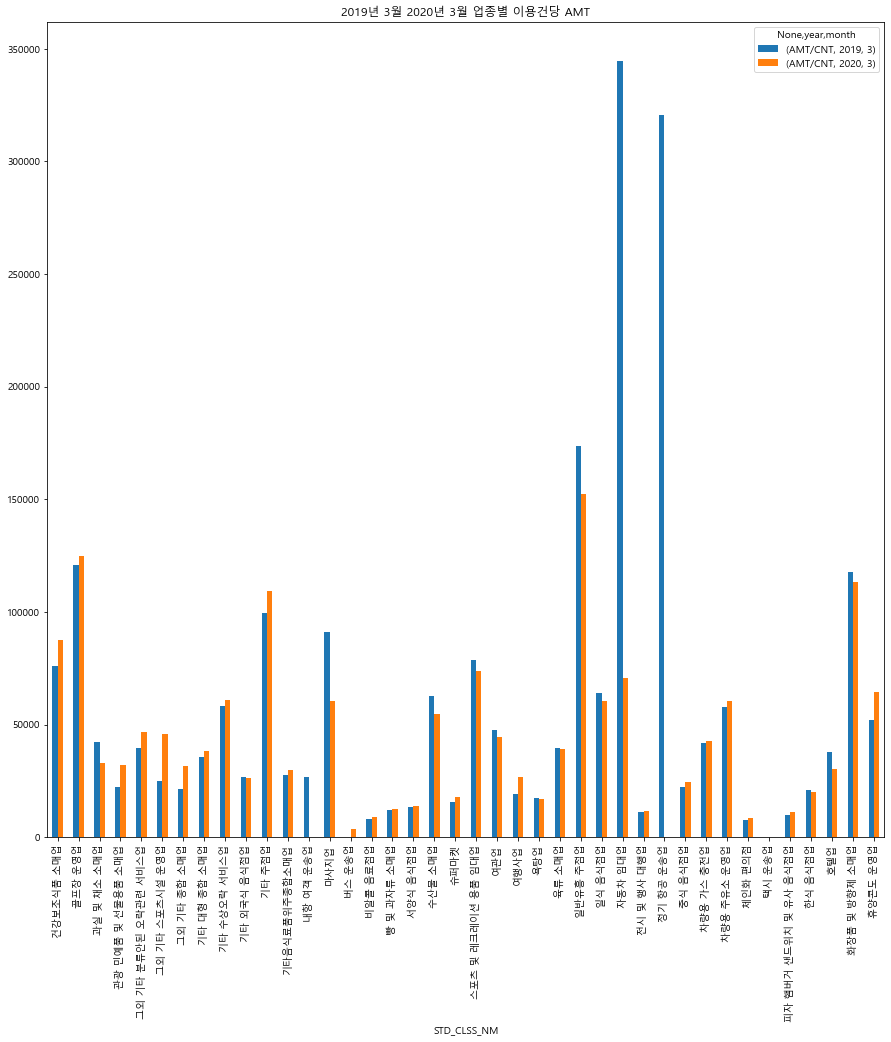

In [26]:
barChar(chungnam_pivot)

# 대구

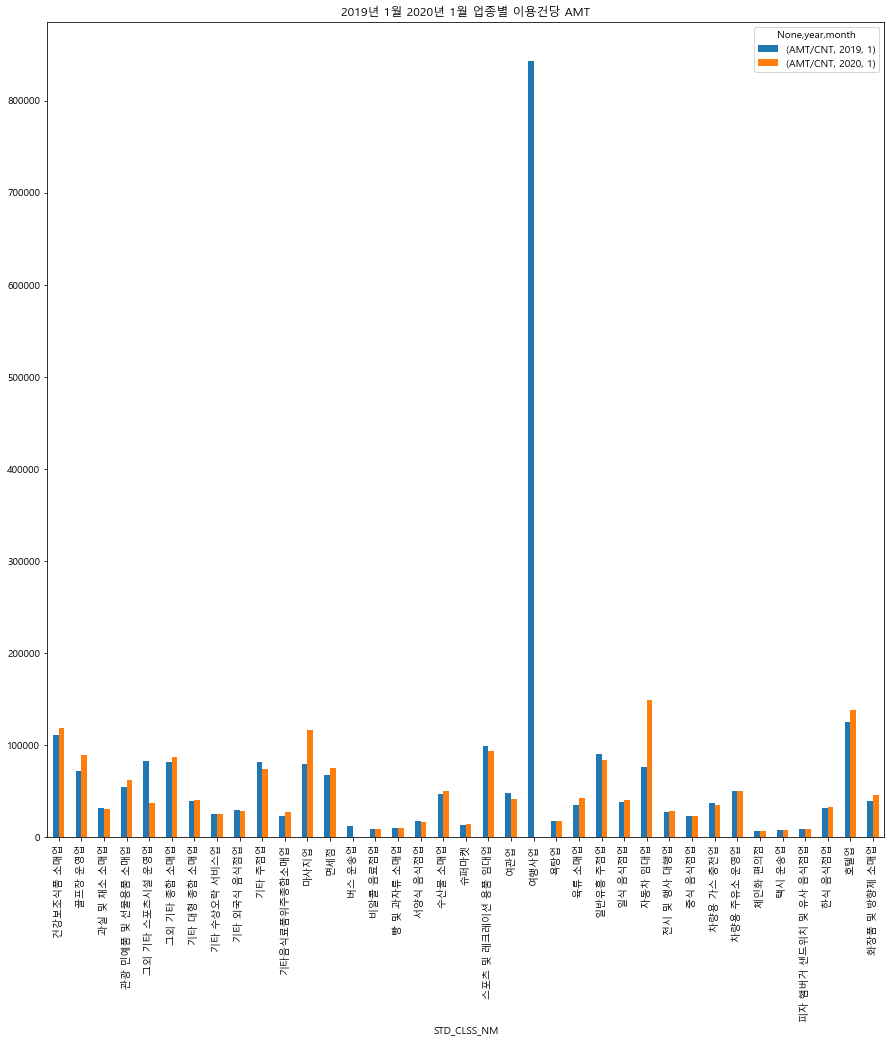

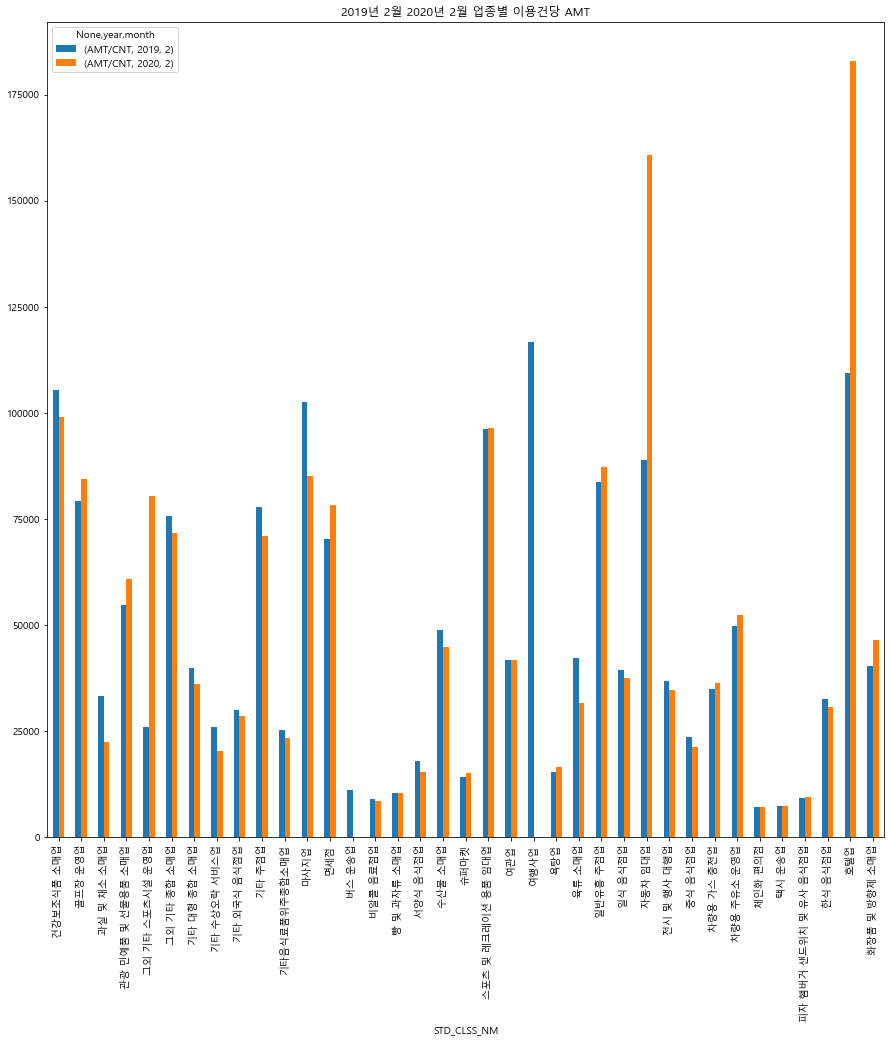

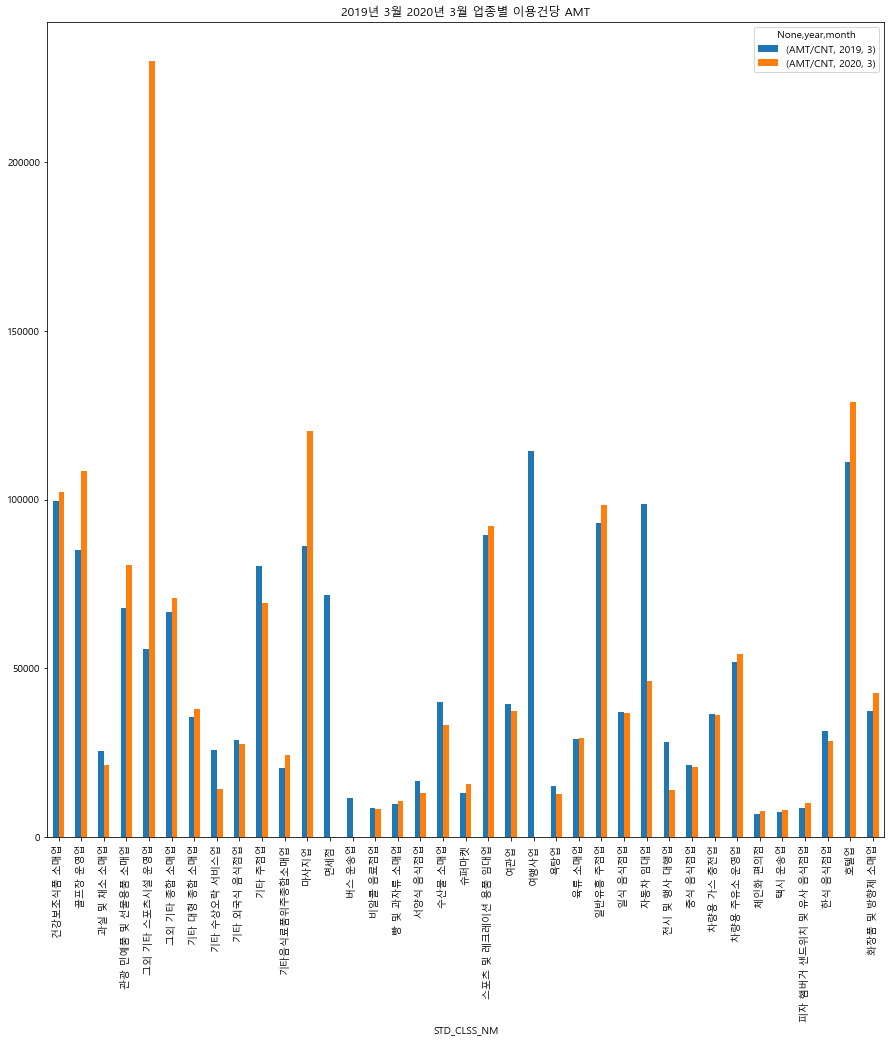

In [27]:
barChar(daegu_pivot)

# 대전

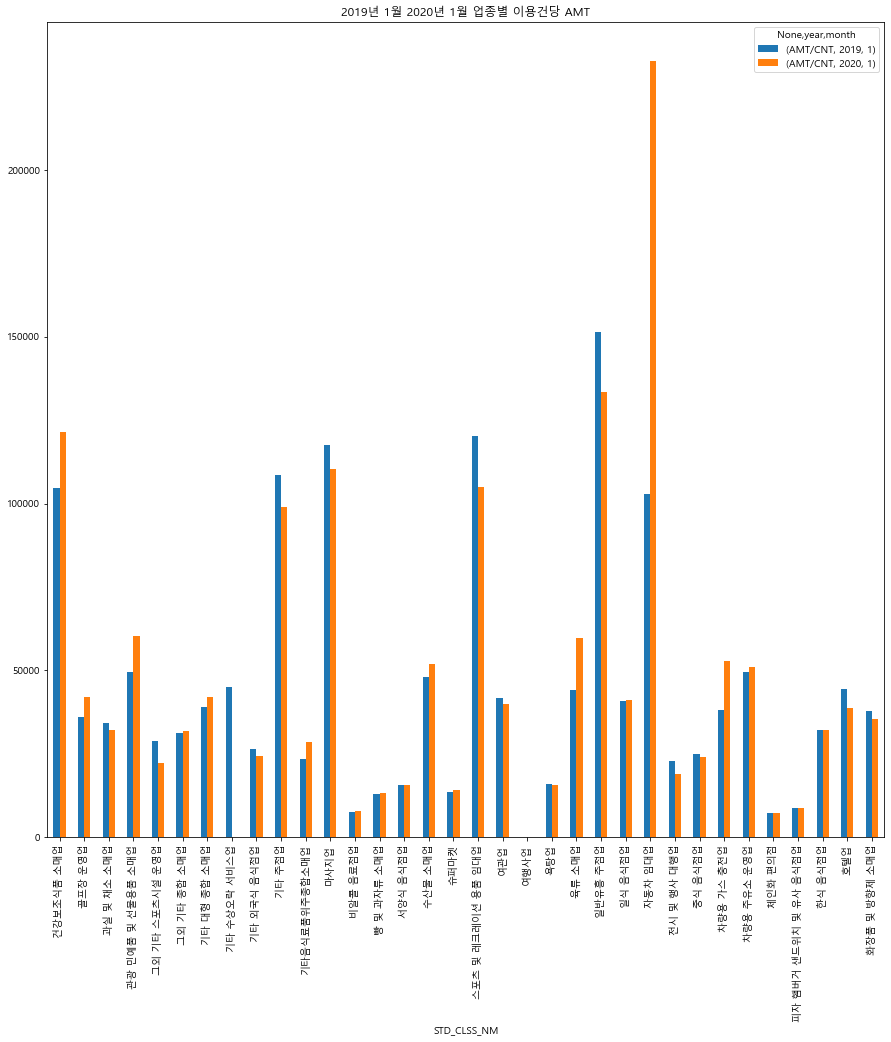

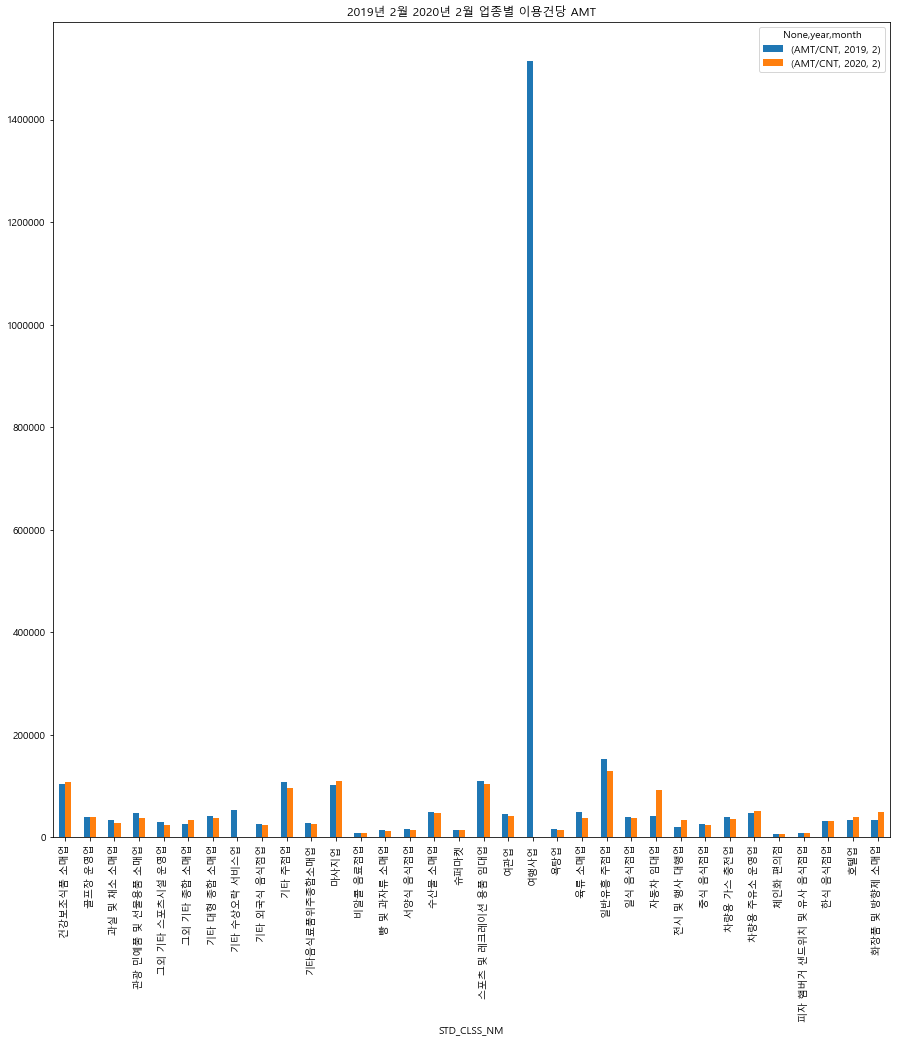

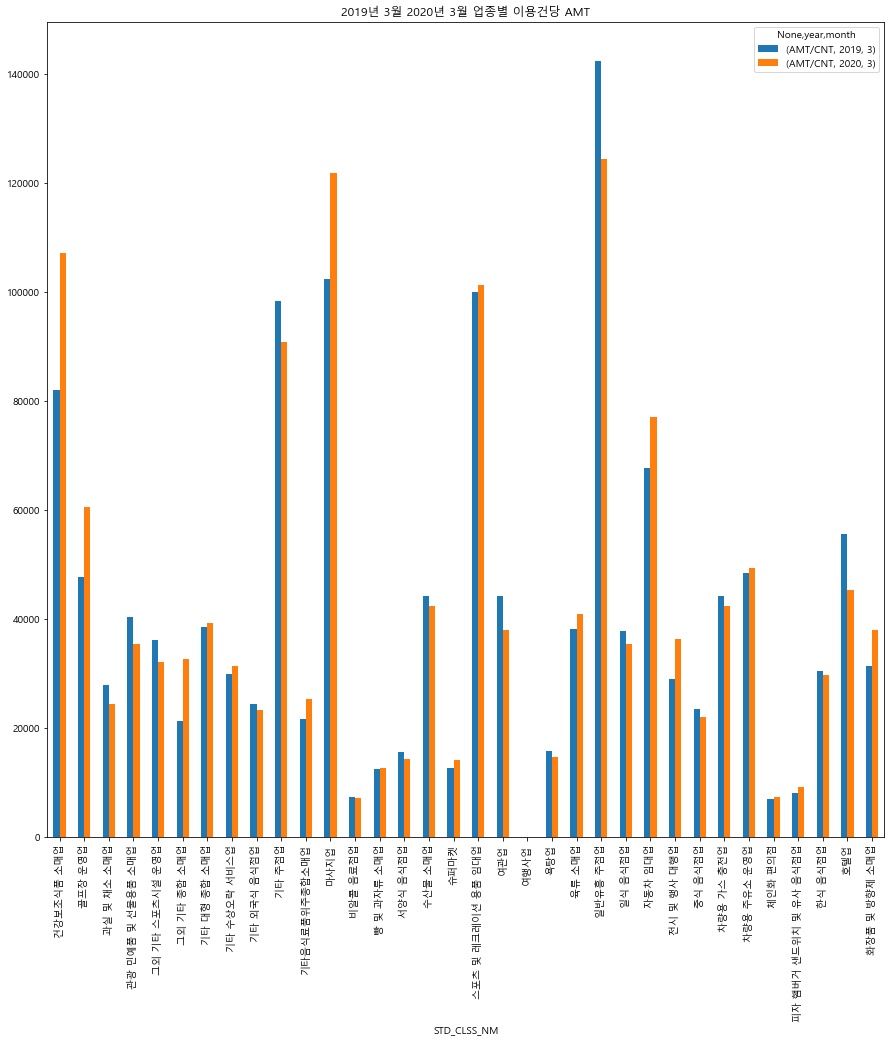

In [28]:
barChar(daejeon_pivot)

# 강원

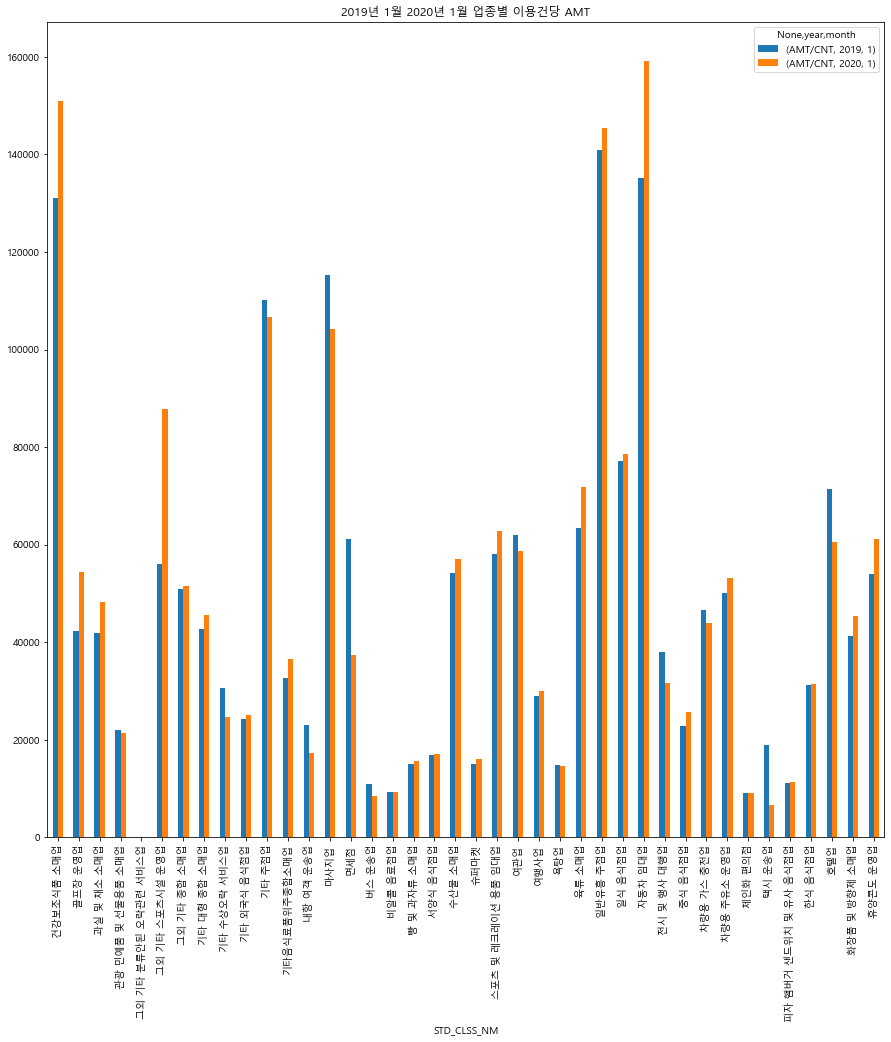

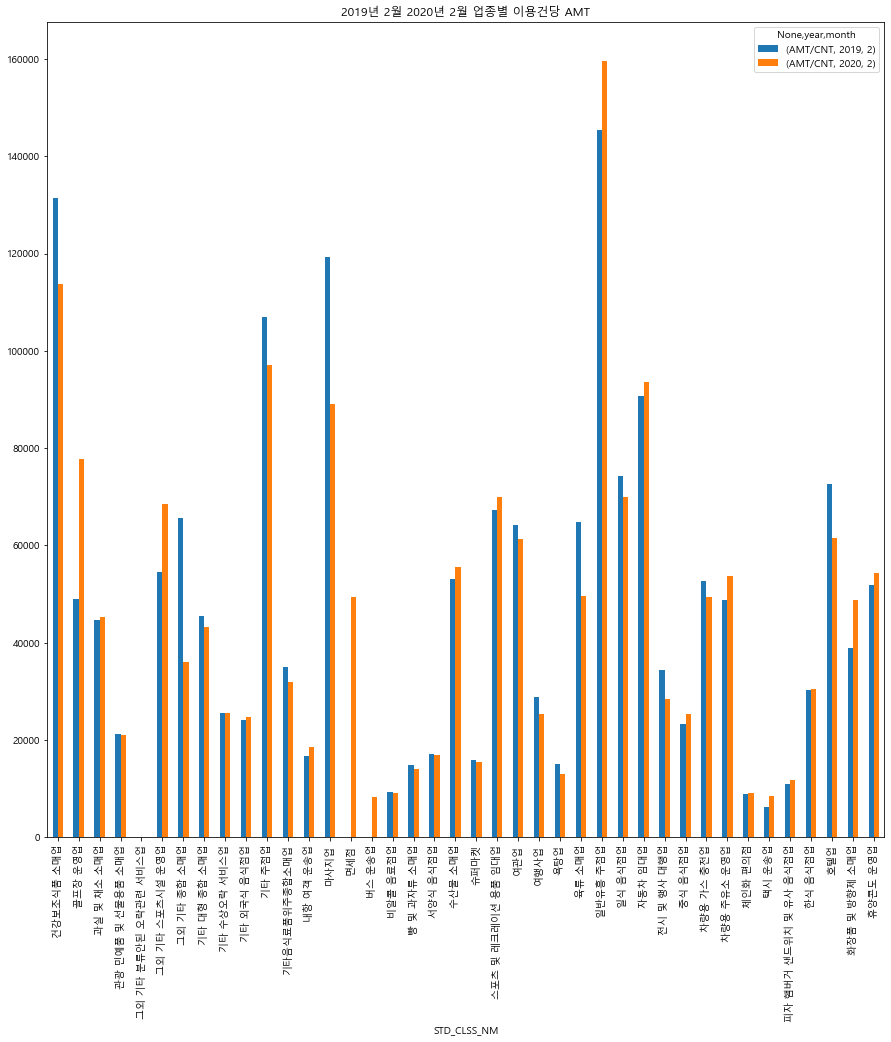

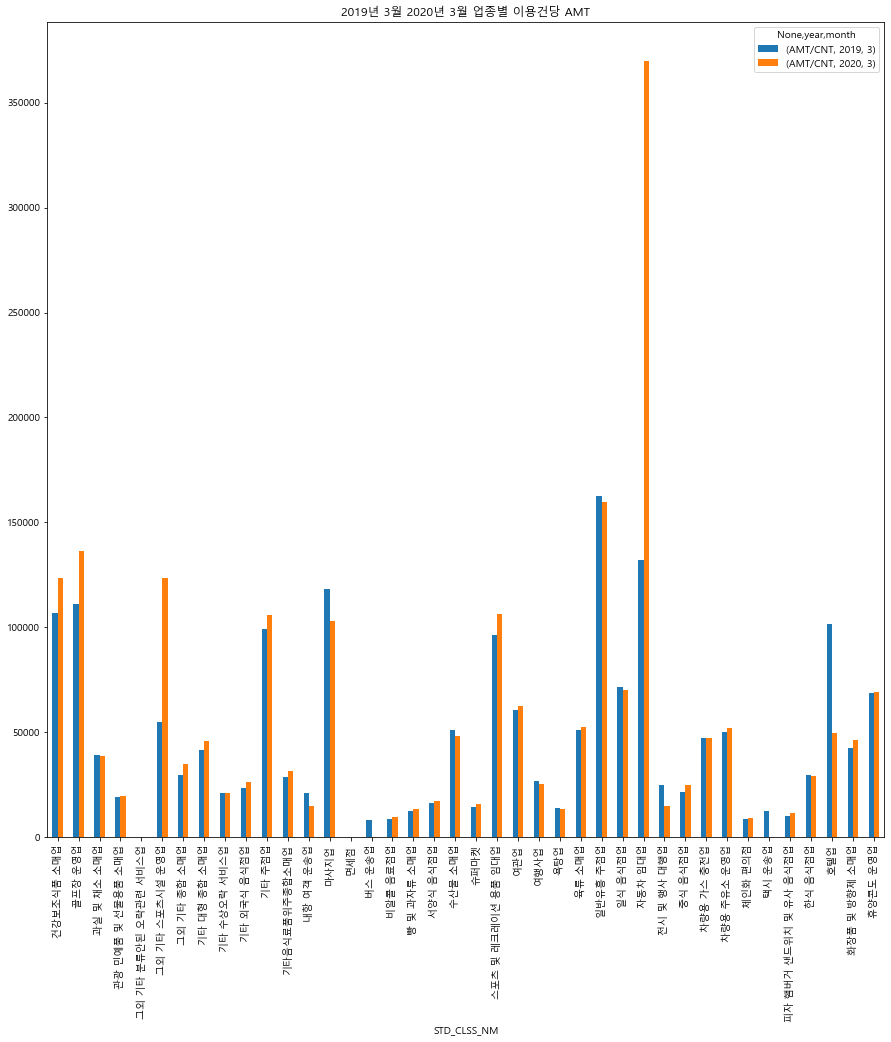

In [29]:
barChar(gangwon_pivot)

# 광주

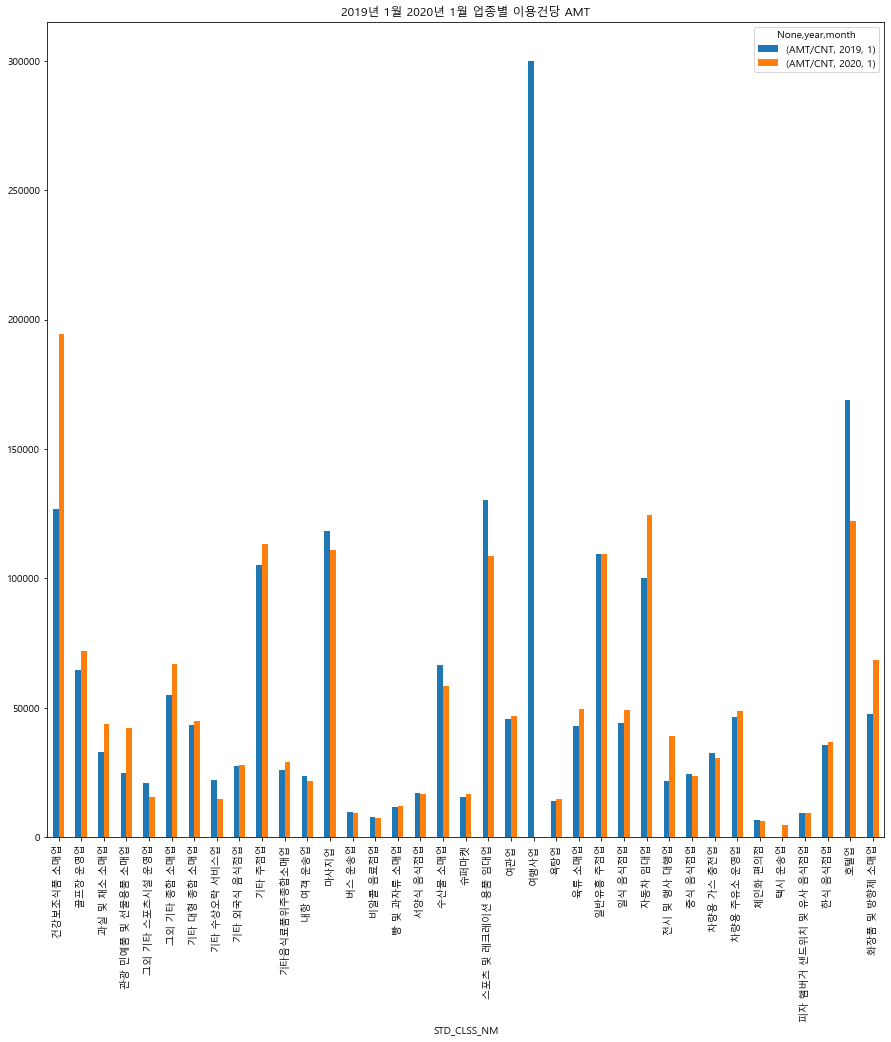

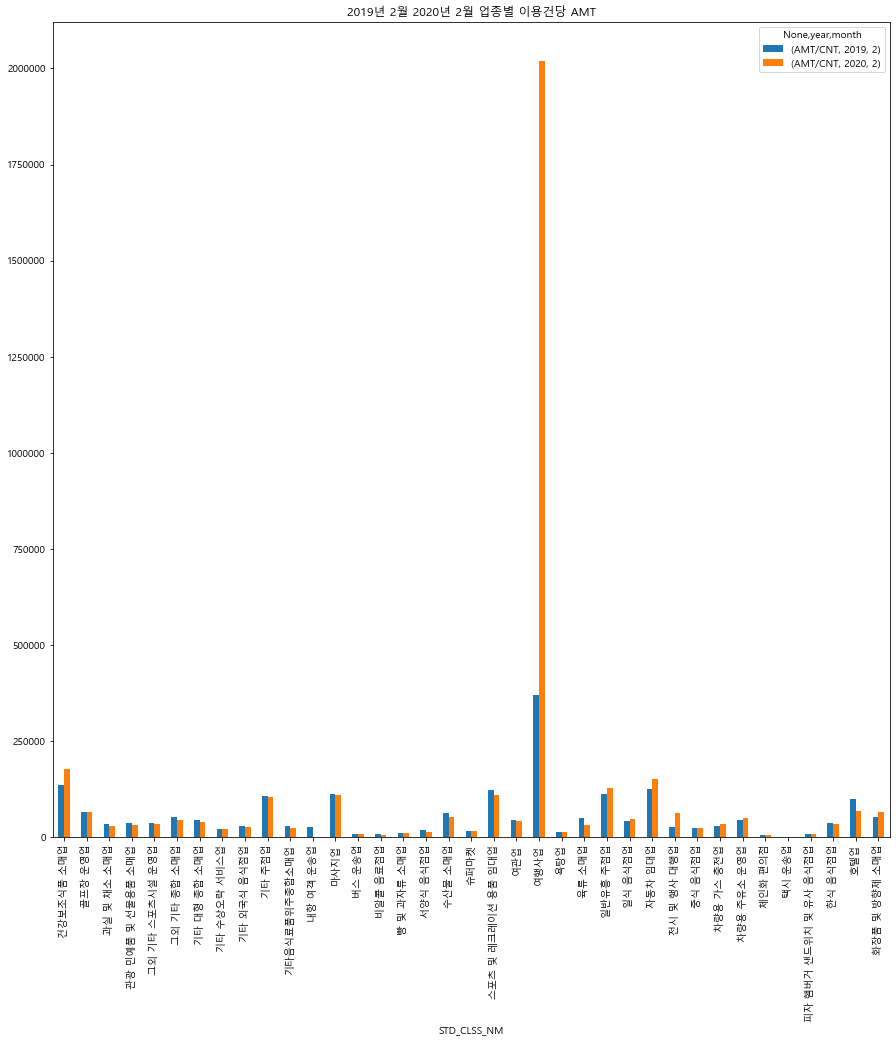

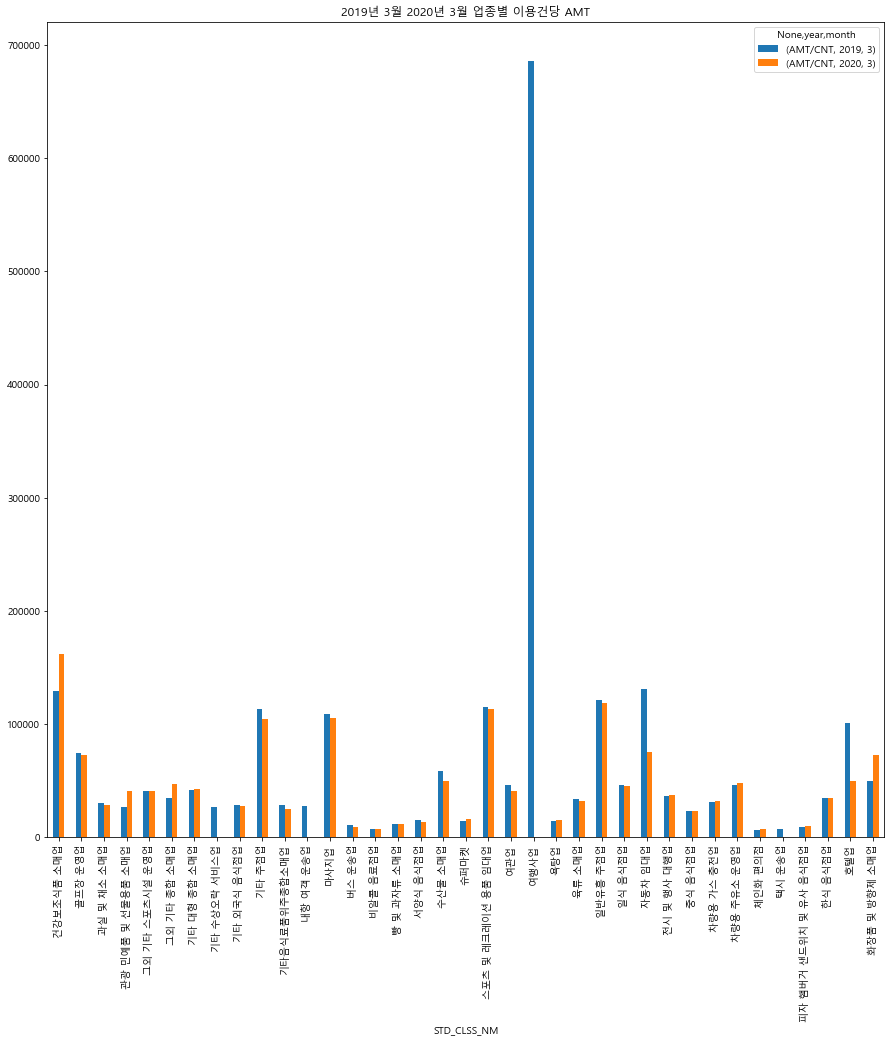

In [30]:
barChar(gwangju_pivot)

# 경북

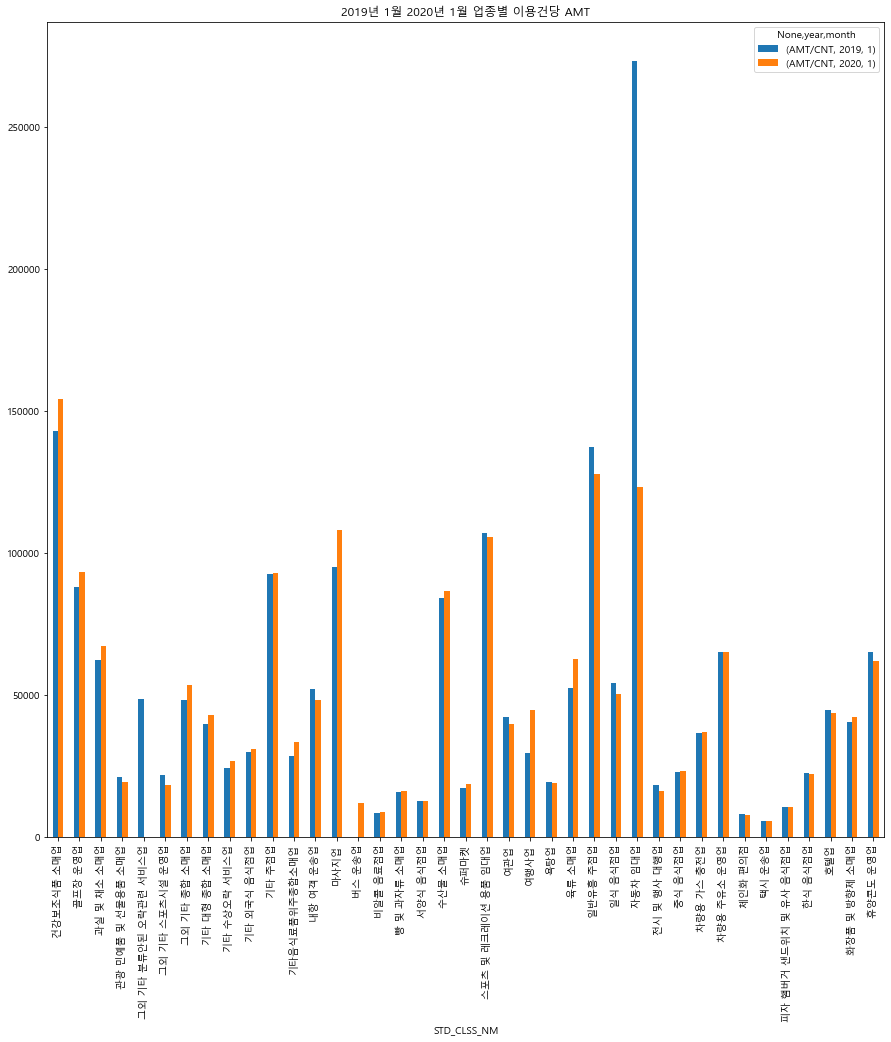

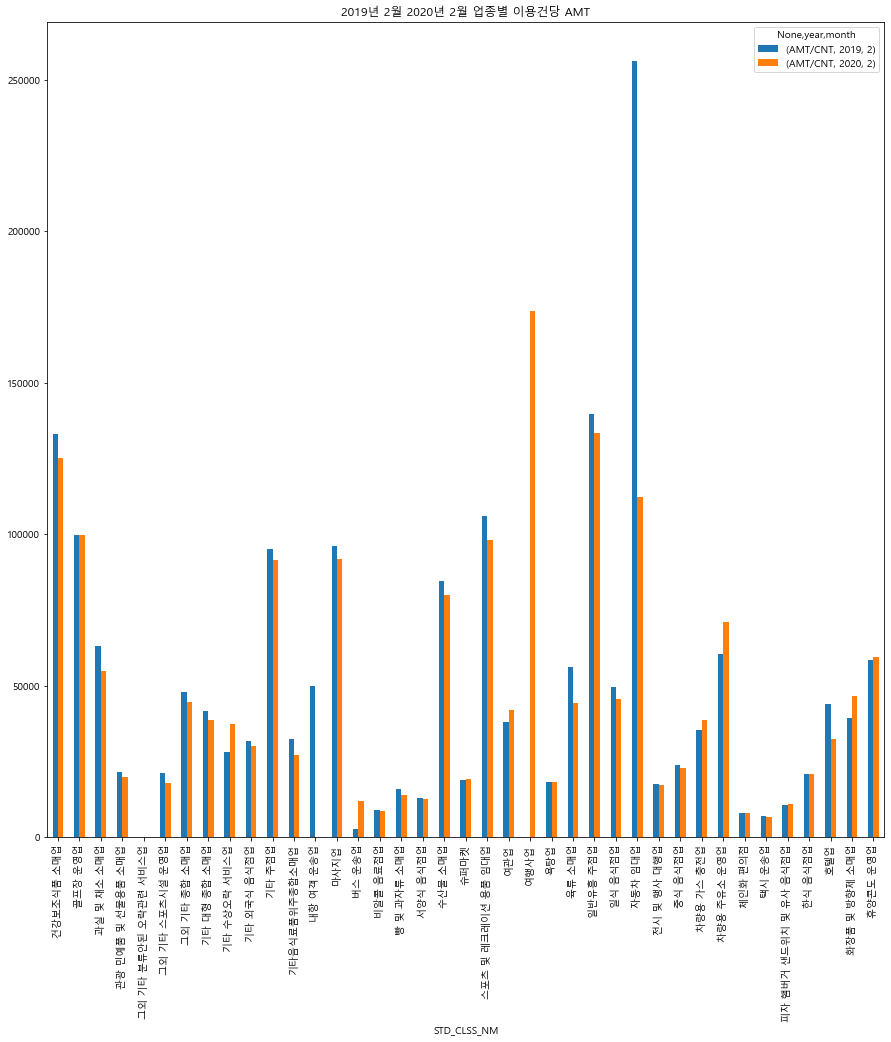

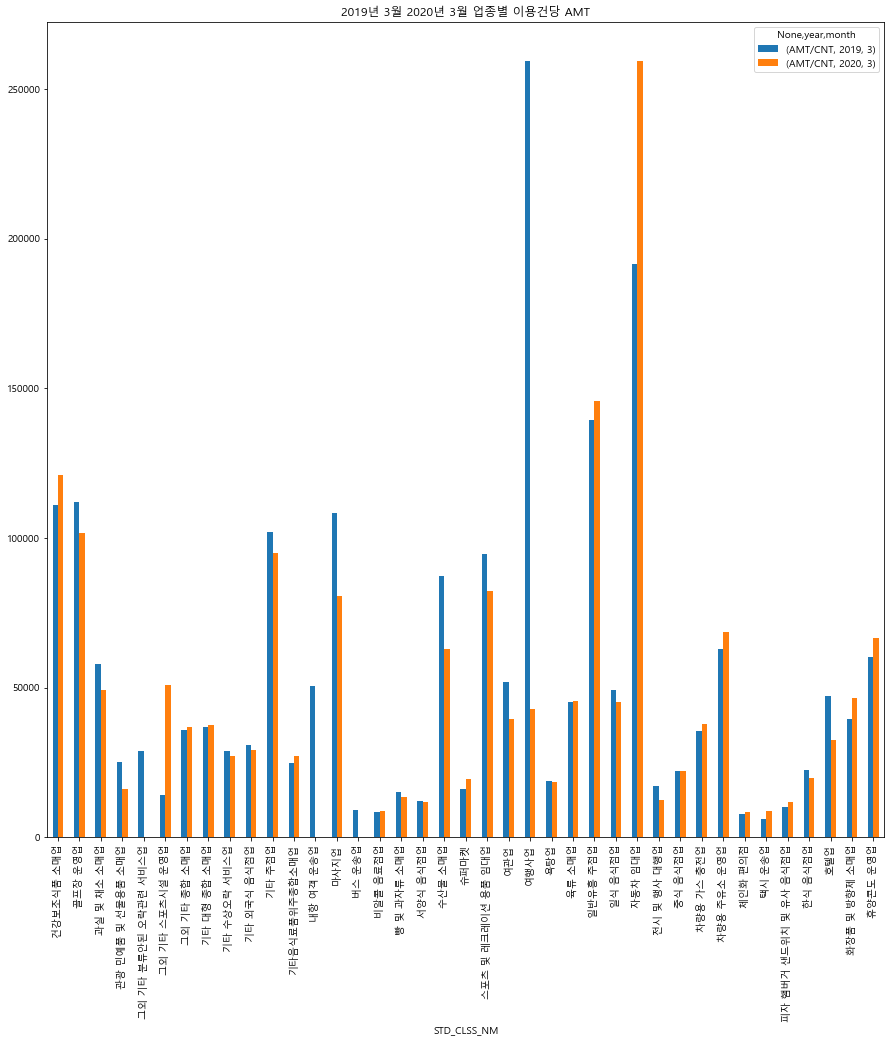

In [31]:
barChar(gyeongbuk_pivot)

# 경기

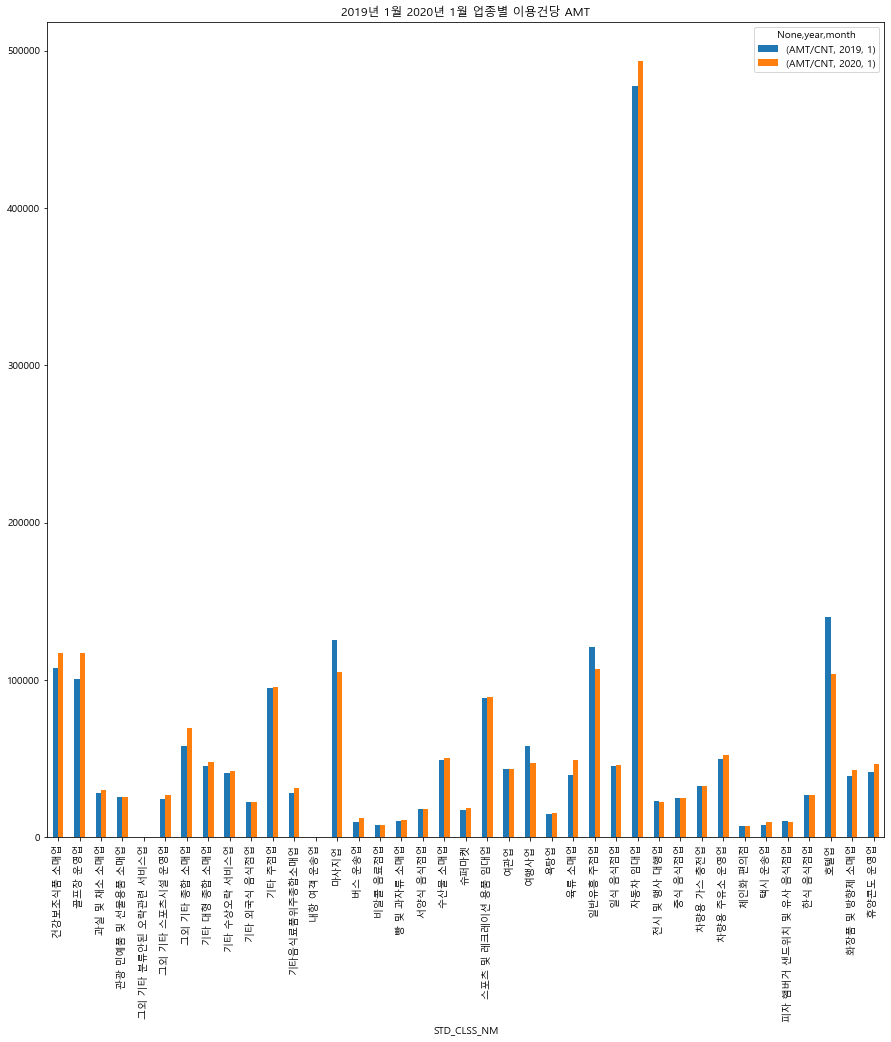

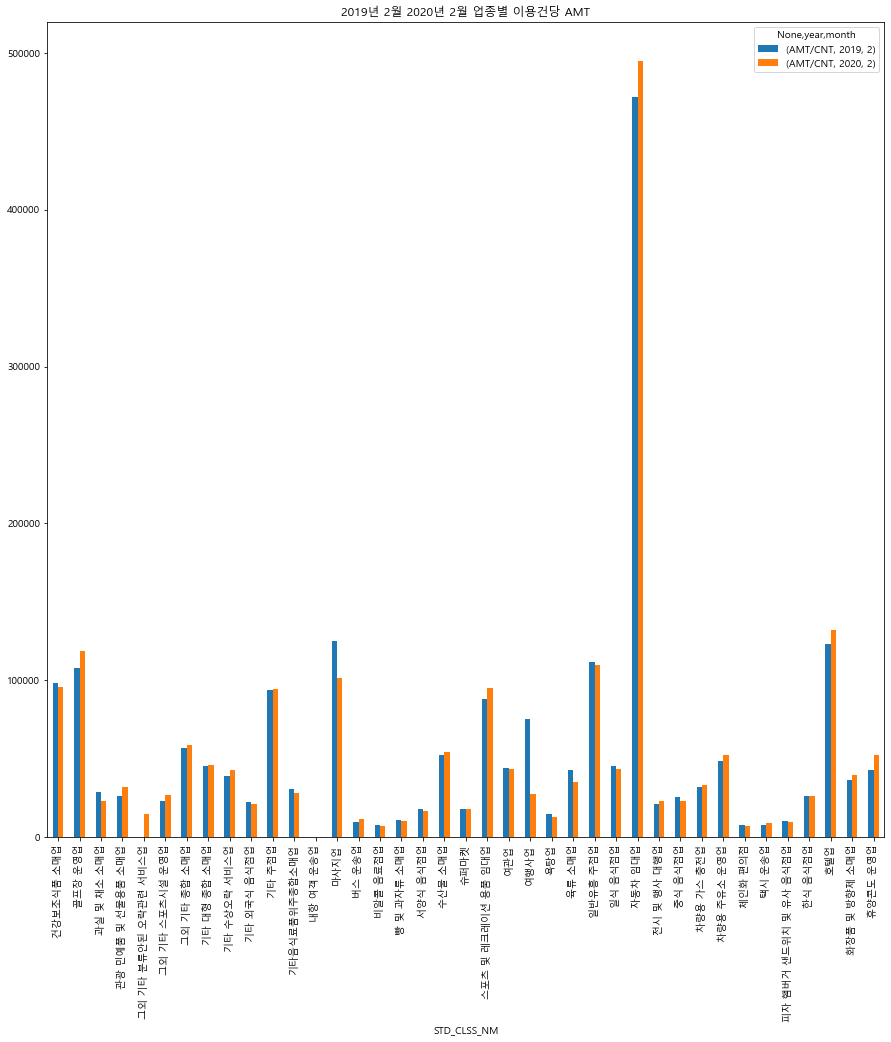

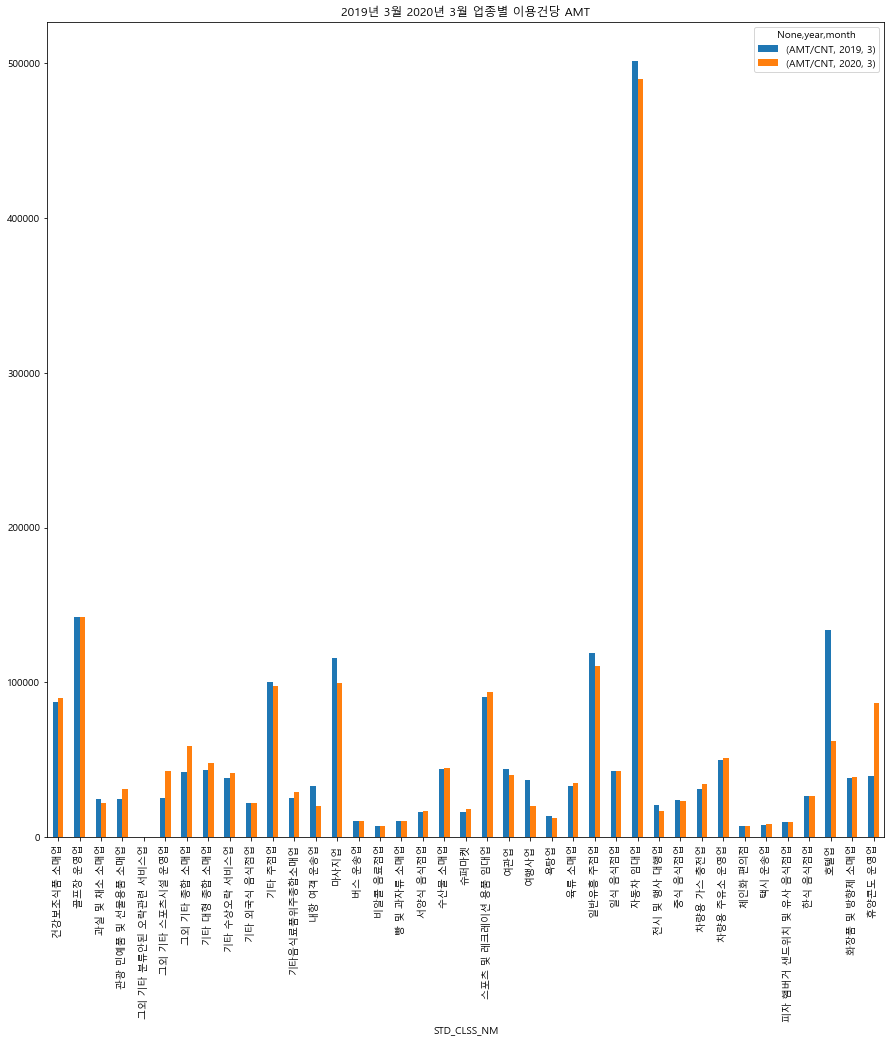

In [32]:
barChar(gyeongi_pivot)

# 경남

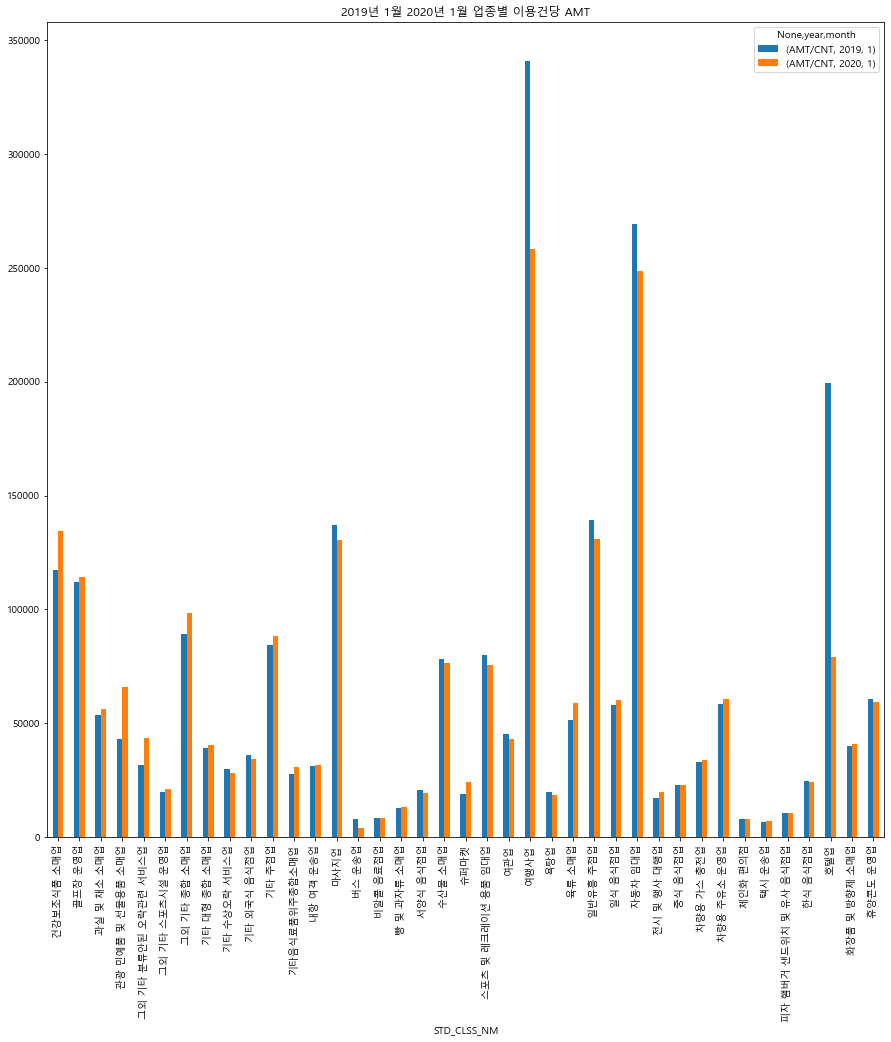

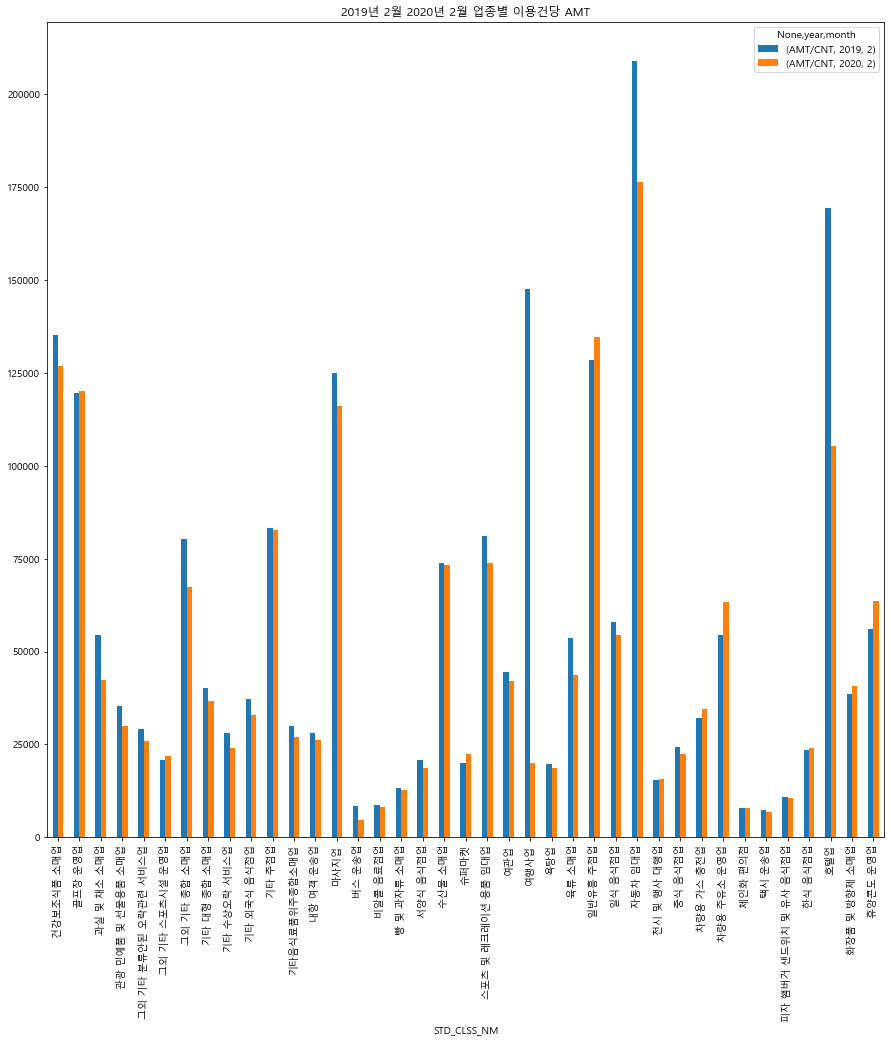

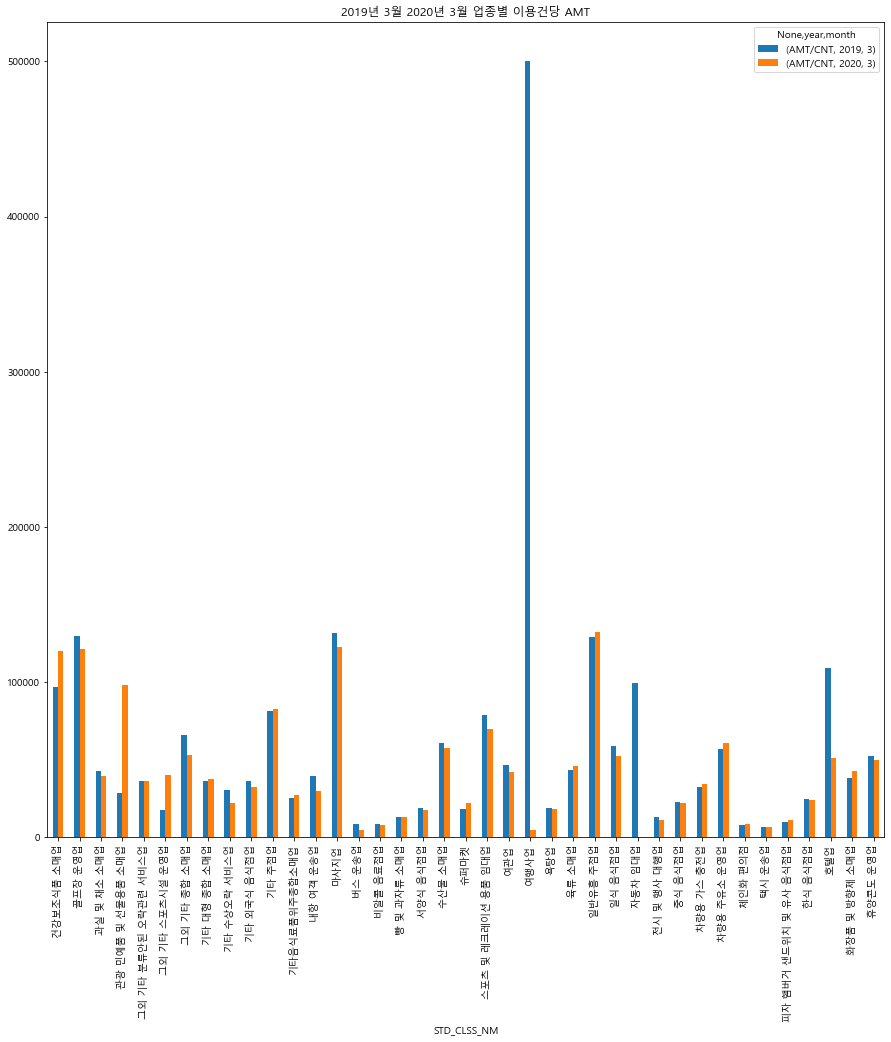

In [33]:
barChar(gyeongnam_pivot)

# 인천

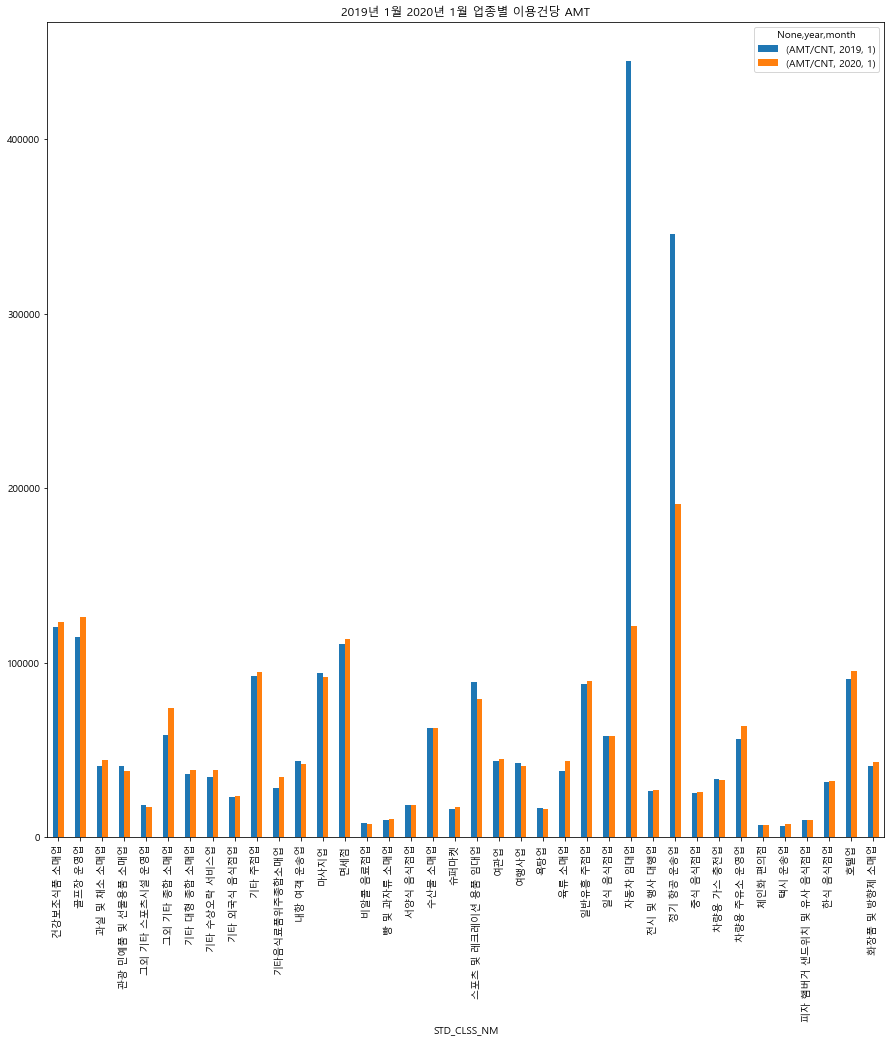

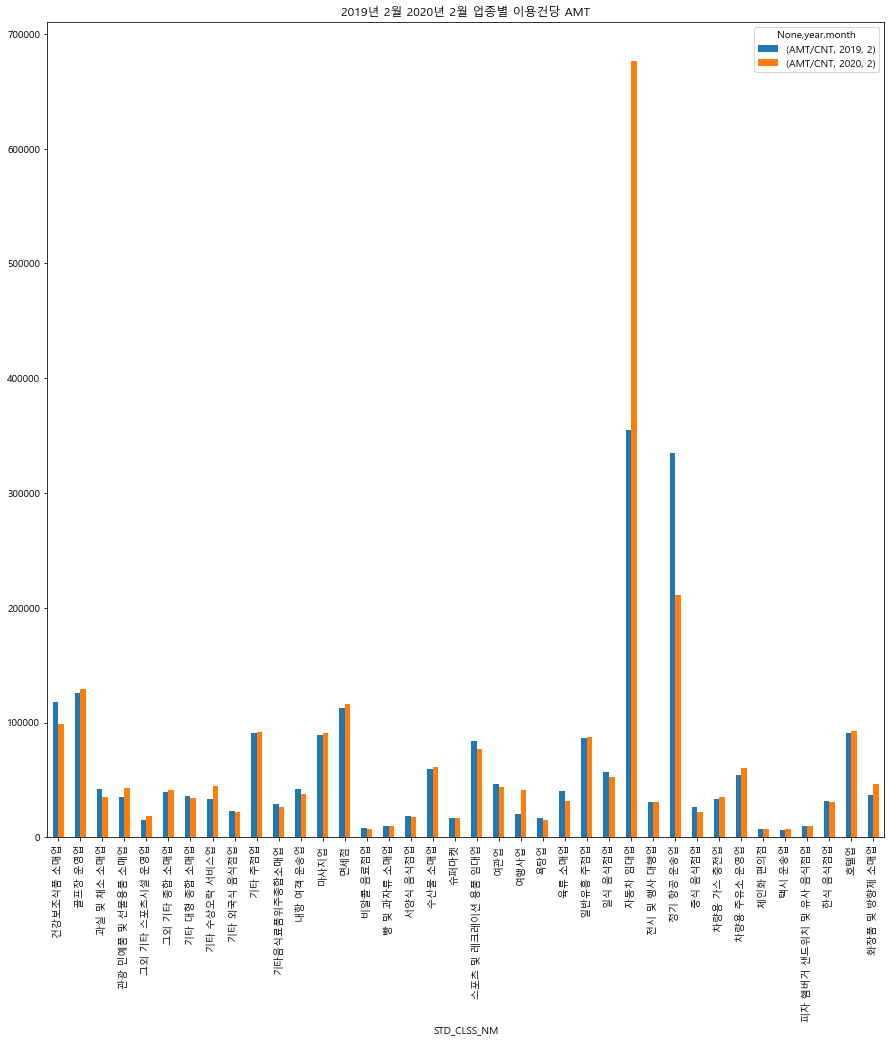

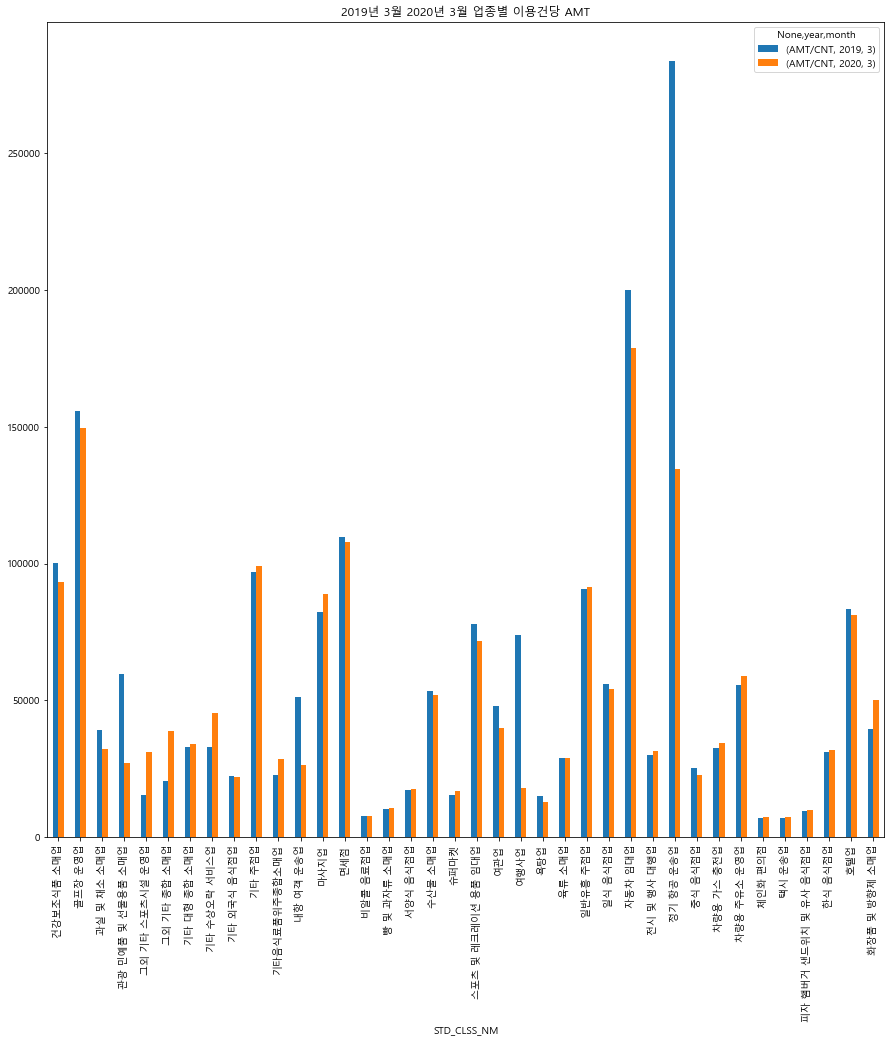

In [34]:
barChar(incheon_pivot)

# 제주

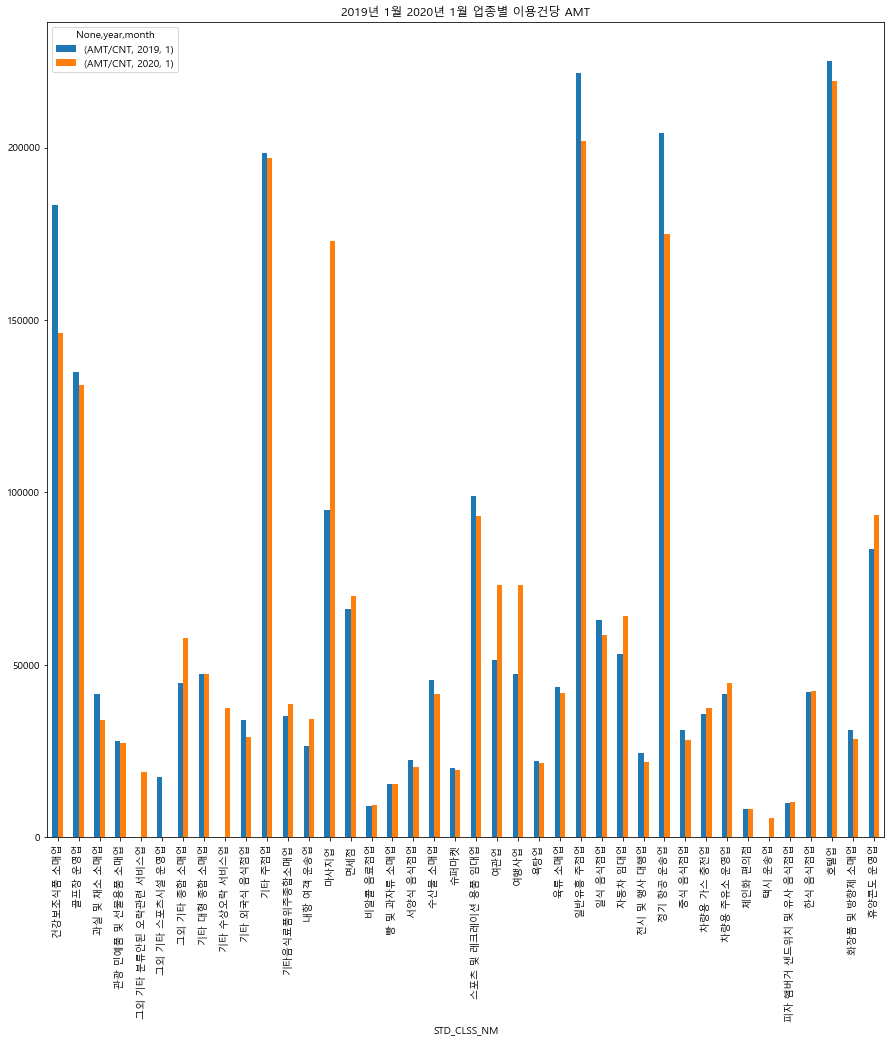

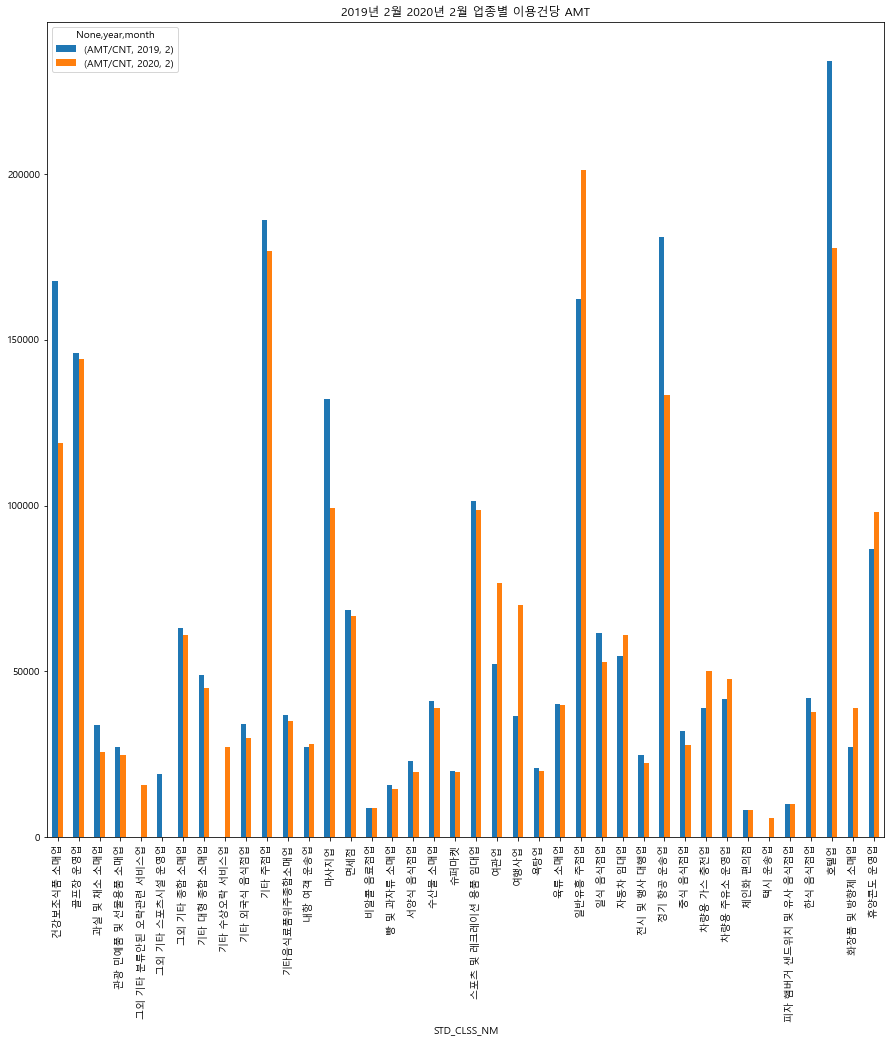

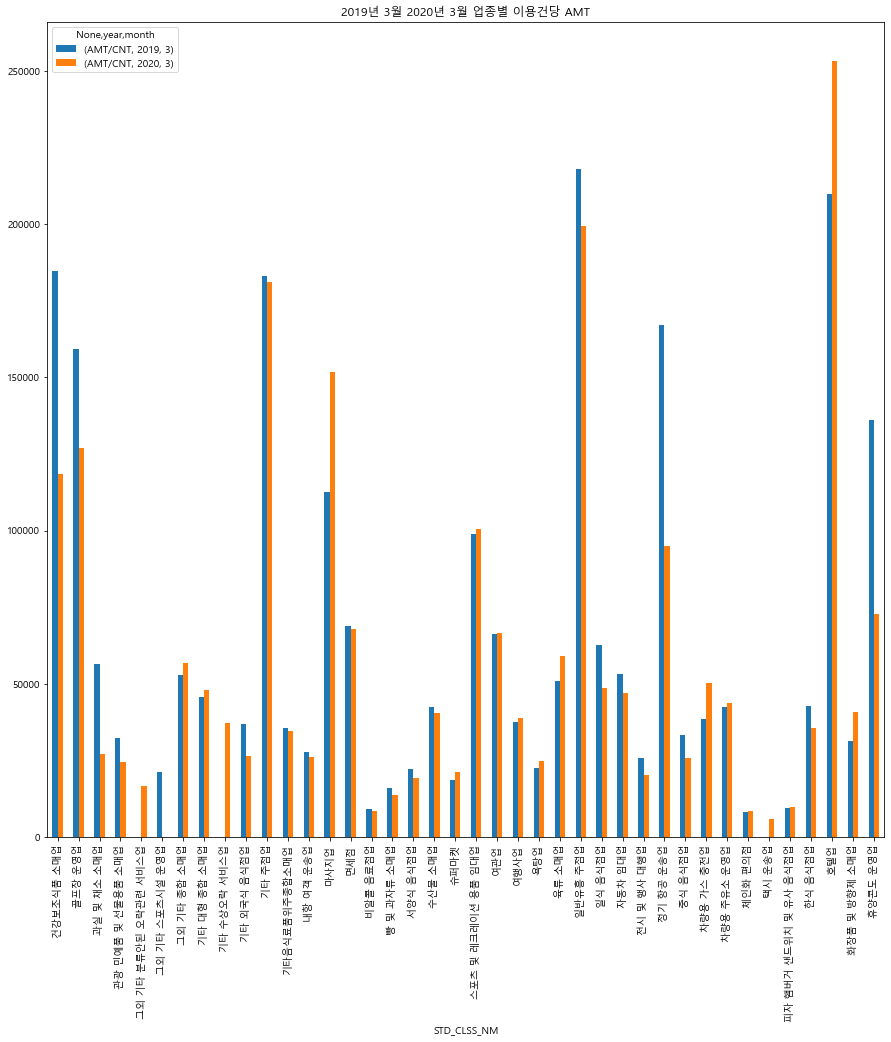

In [35]:
barChar(jeju_pivot)

# 전북

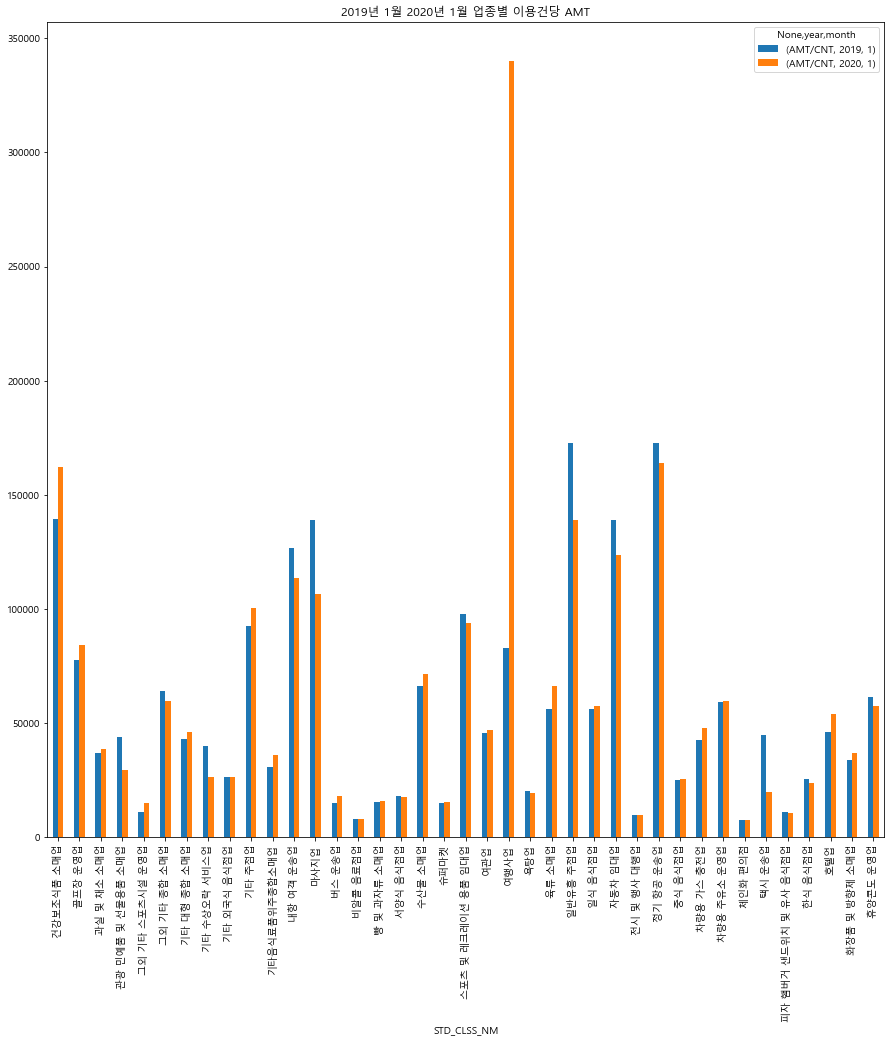

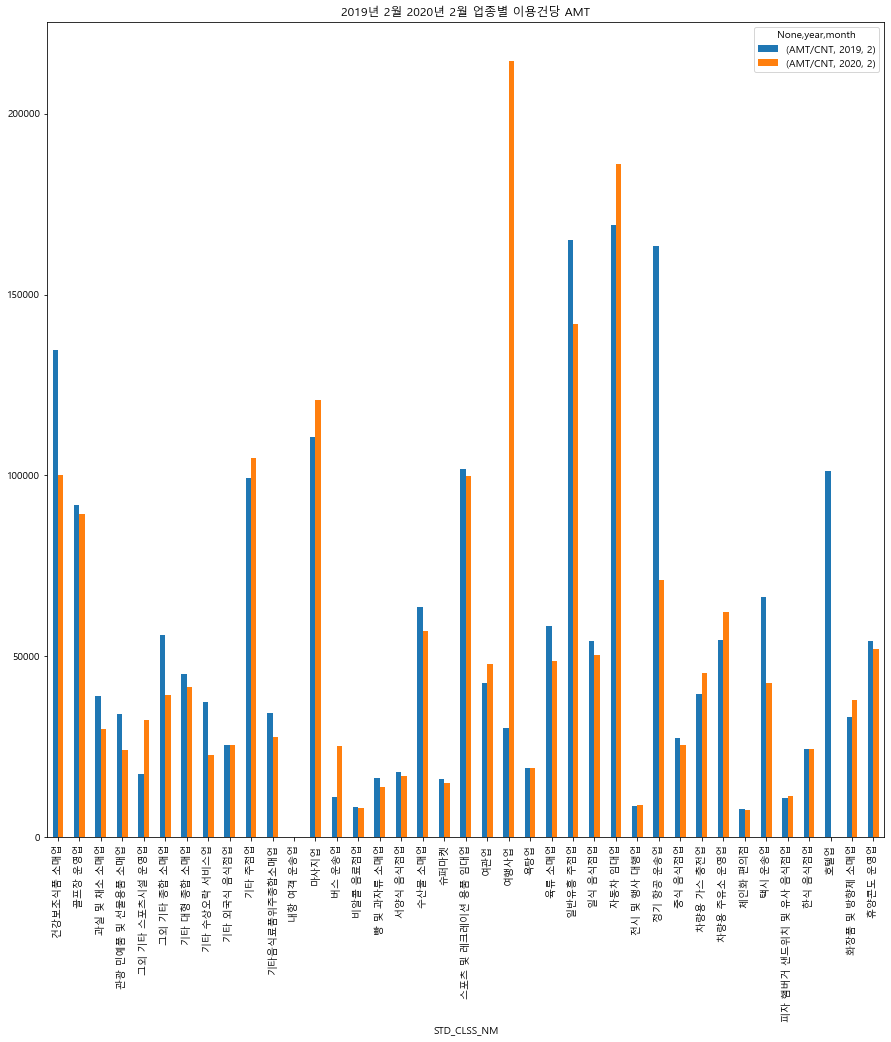

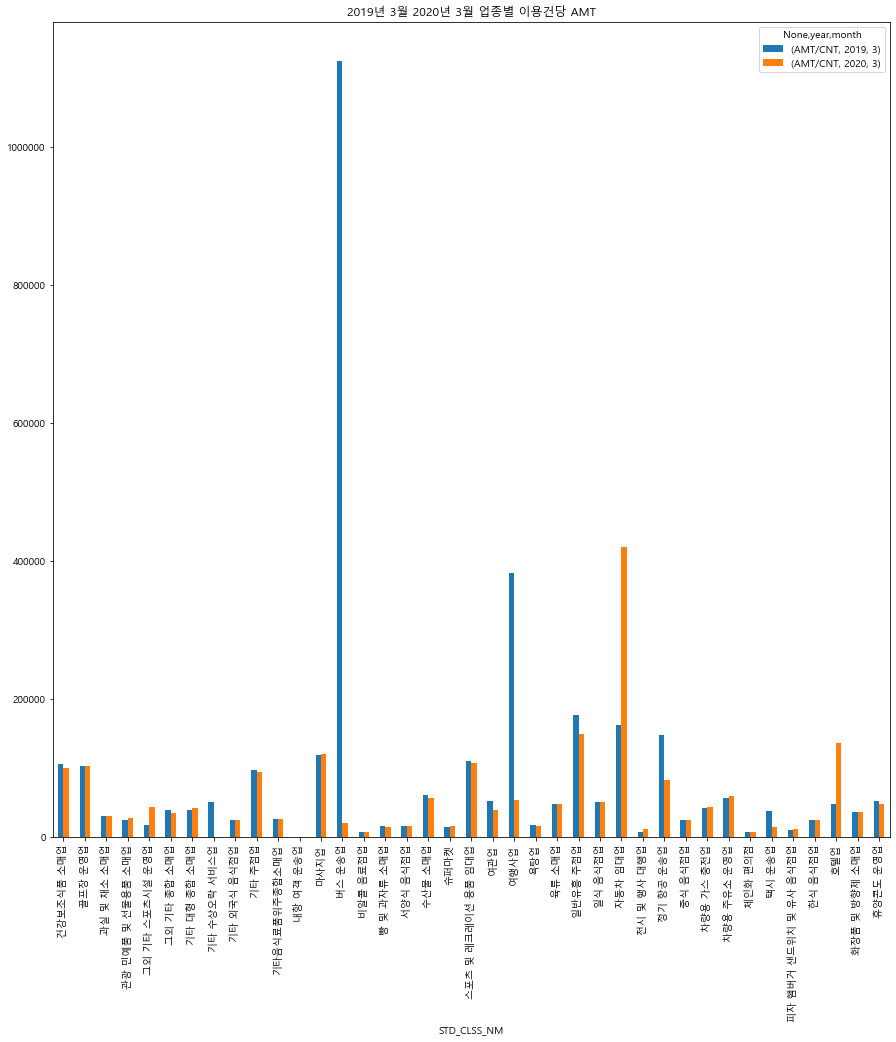

In [36]:
barChar(jeonbuk_pivot)

# 전남

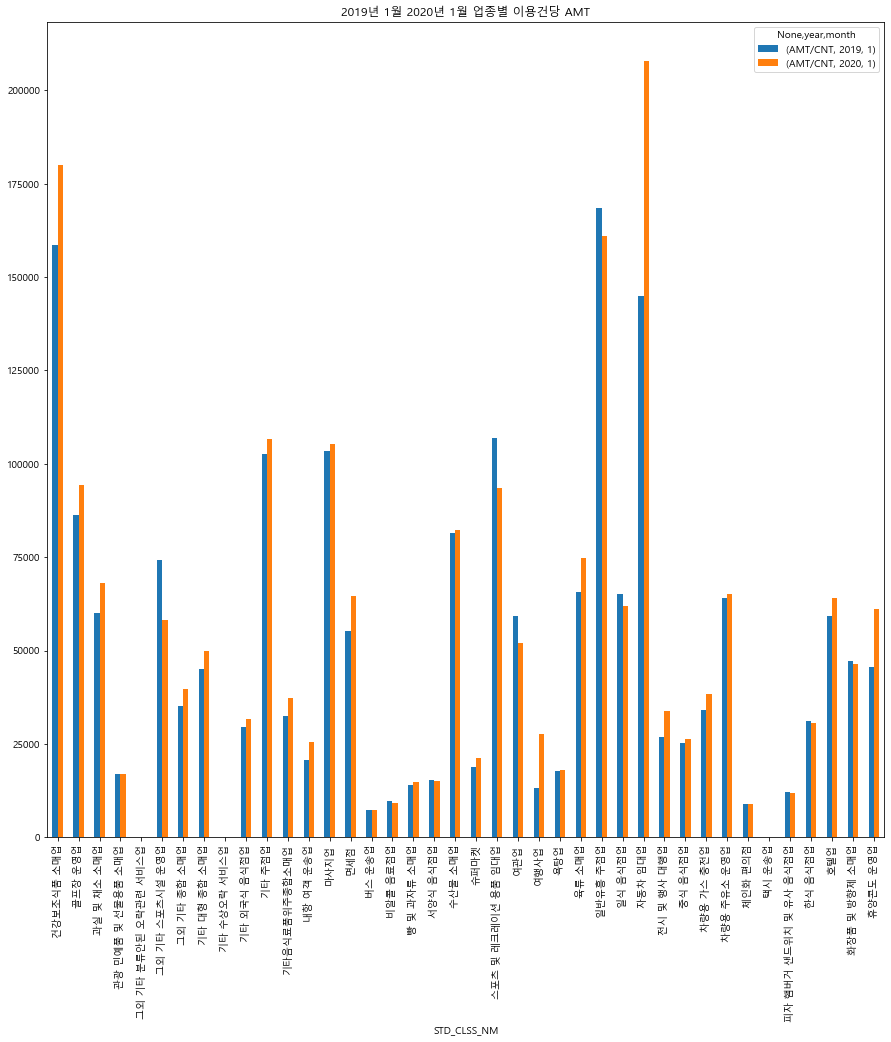

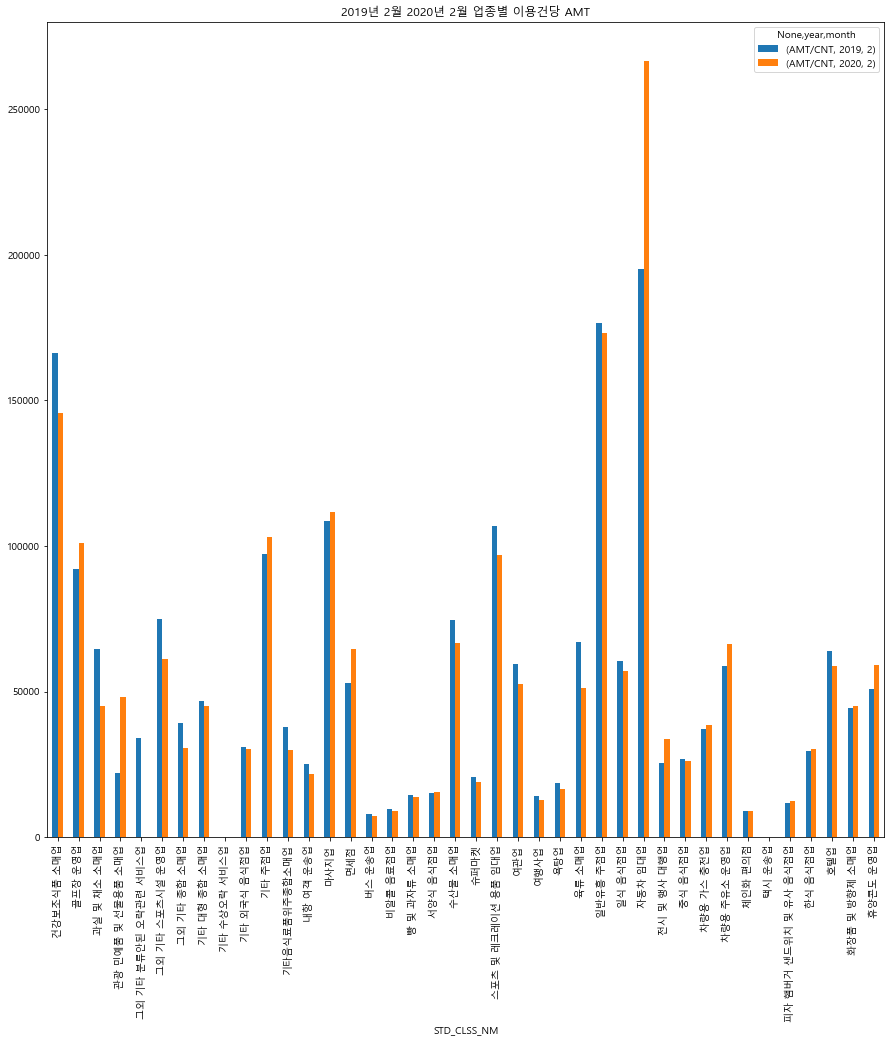

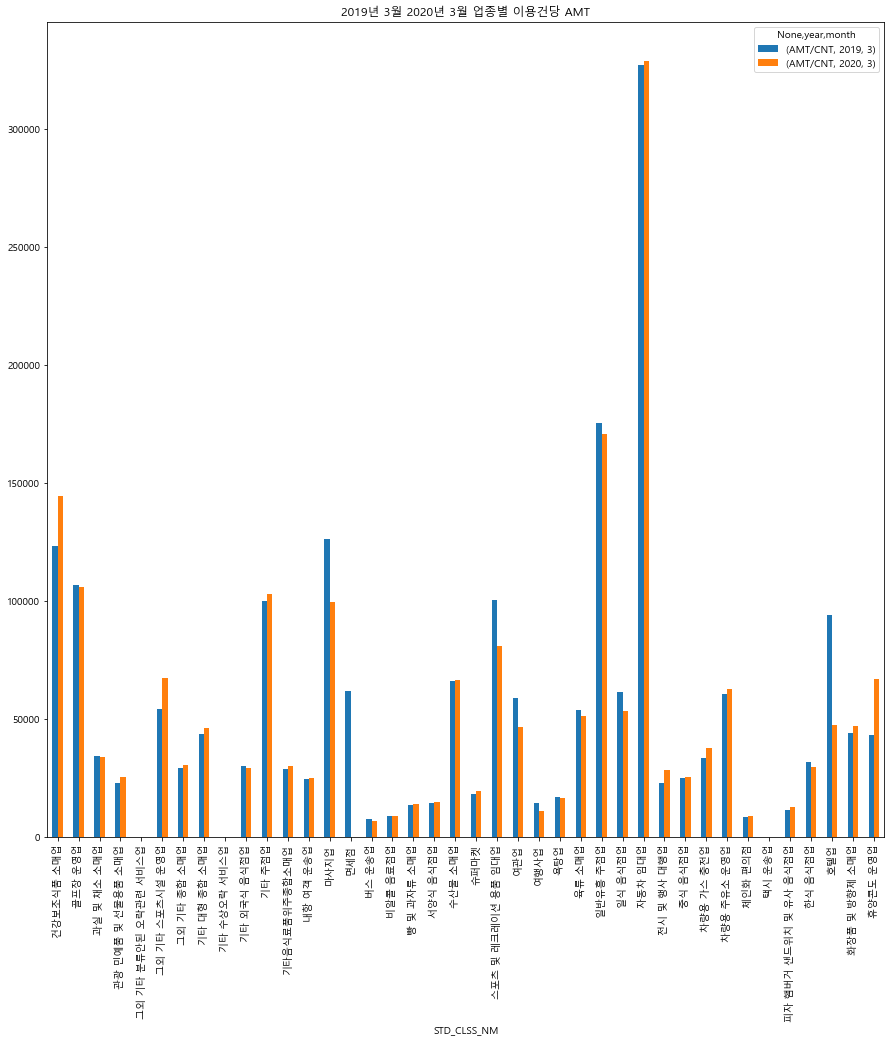

In [37]:
barChar(jeonnam_pivot)

# 세종

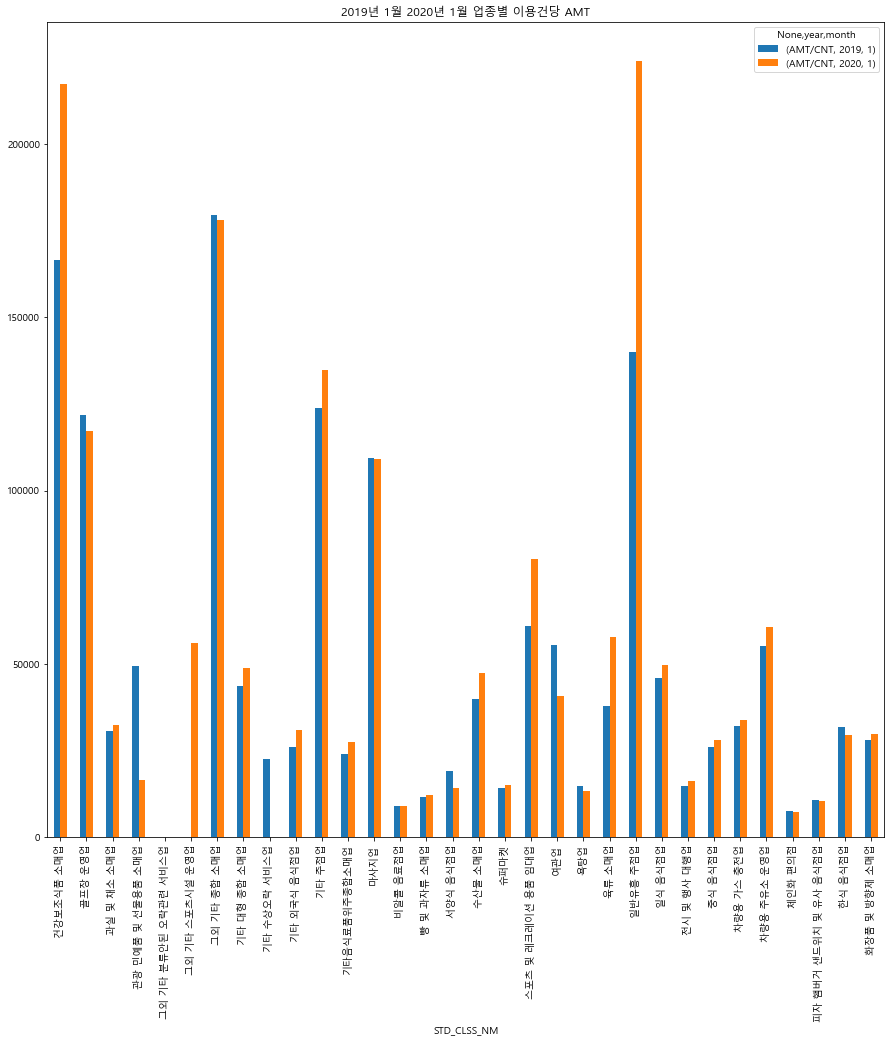

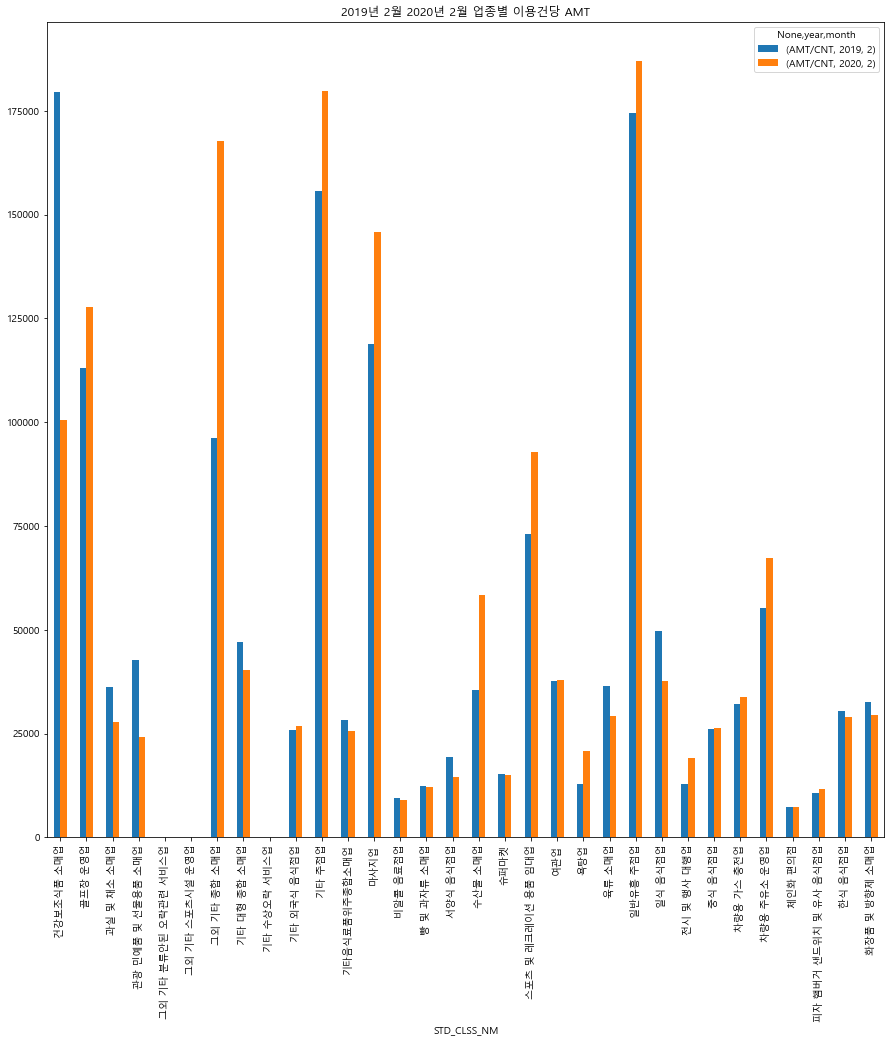

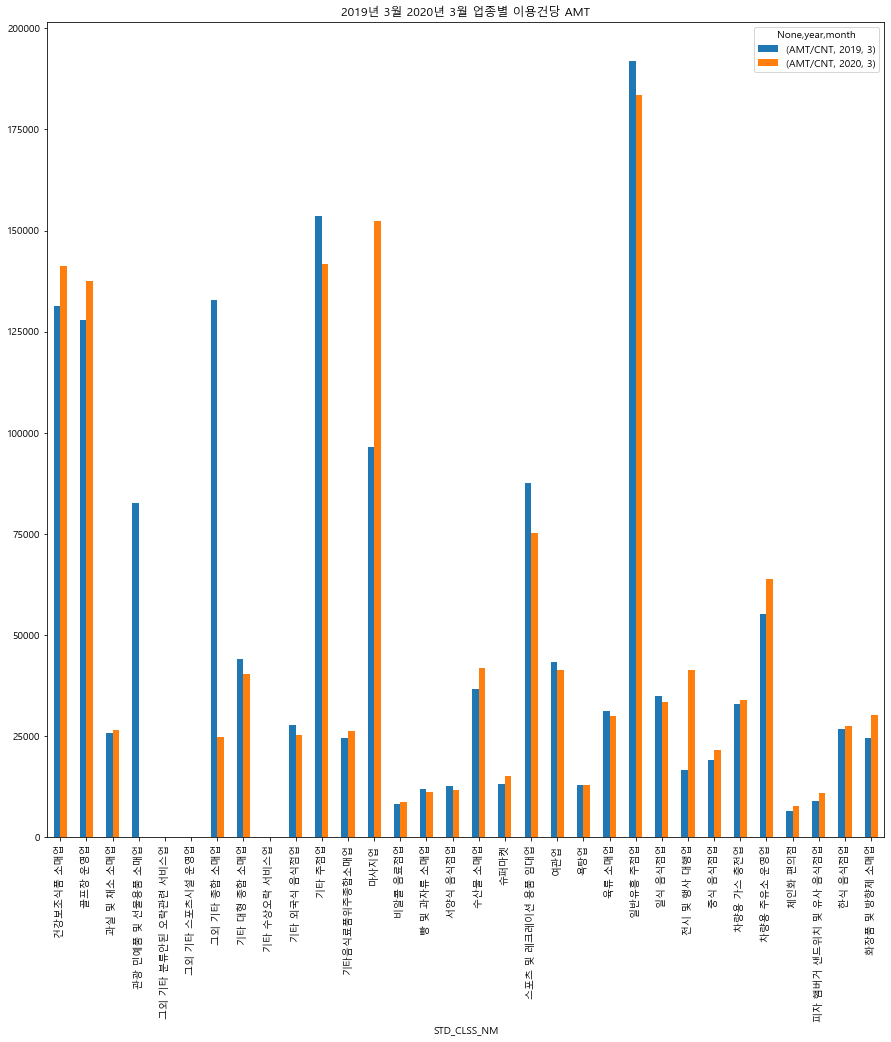

In [38]:
barChar(sejong_pivot)

# 서울

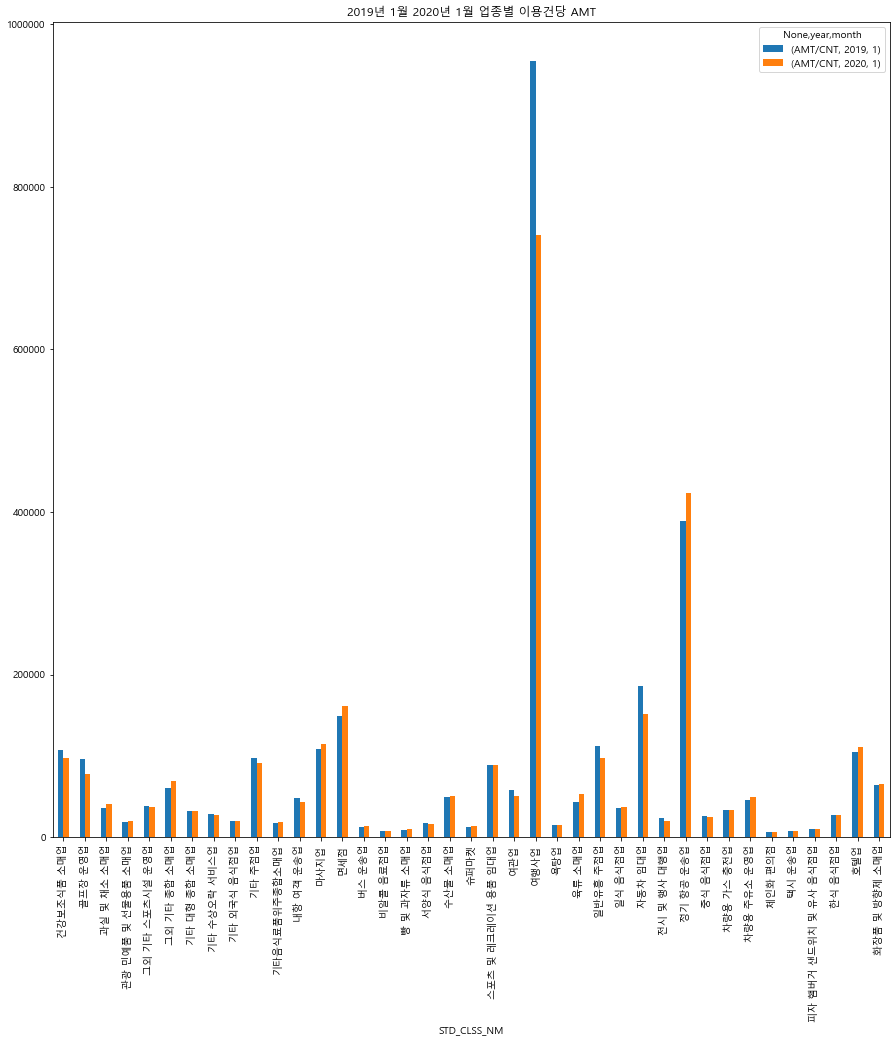

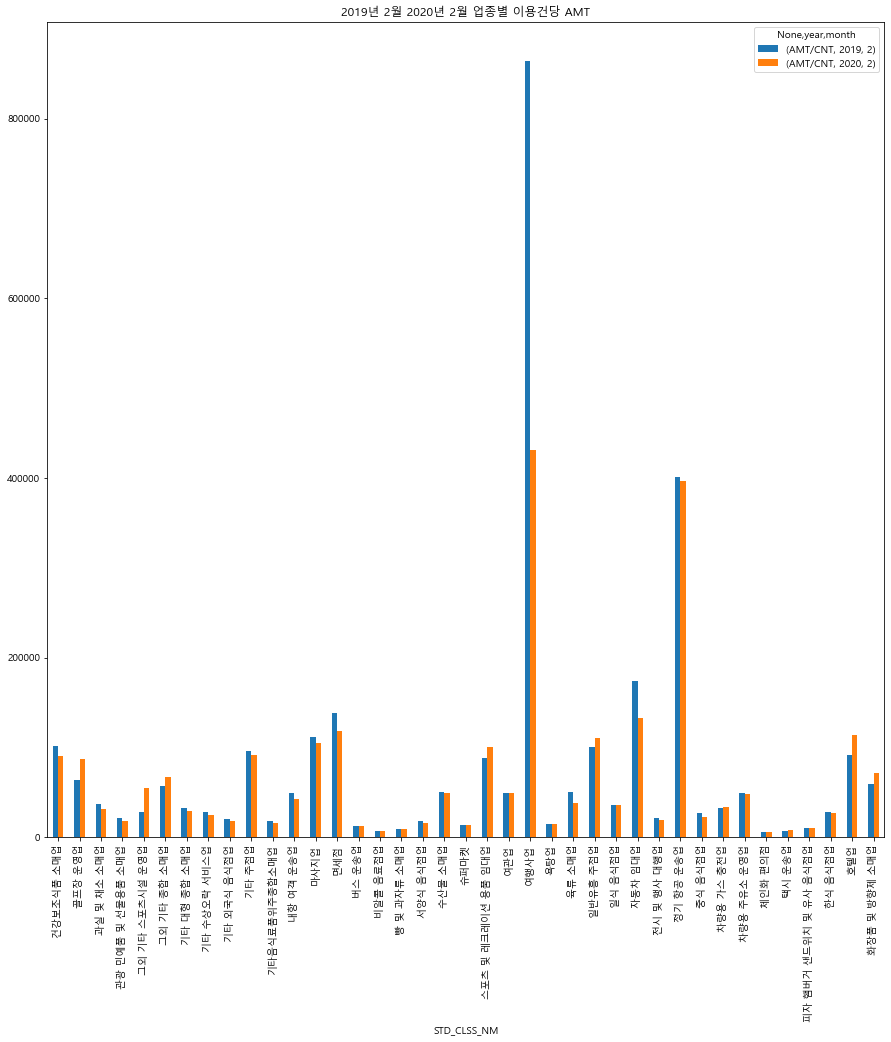

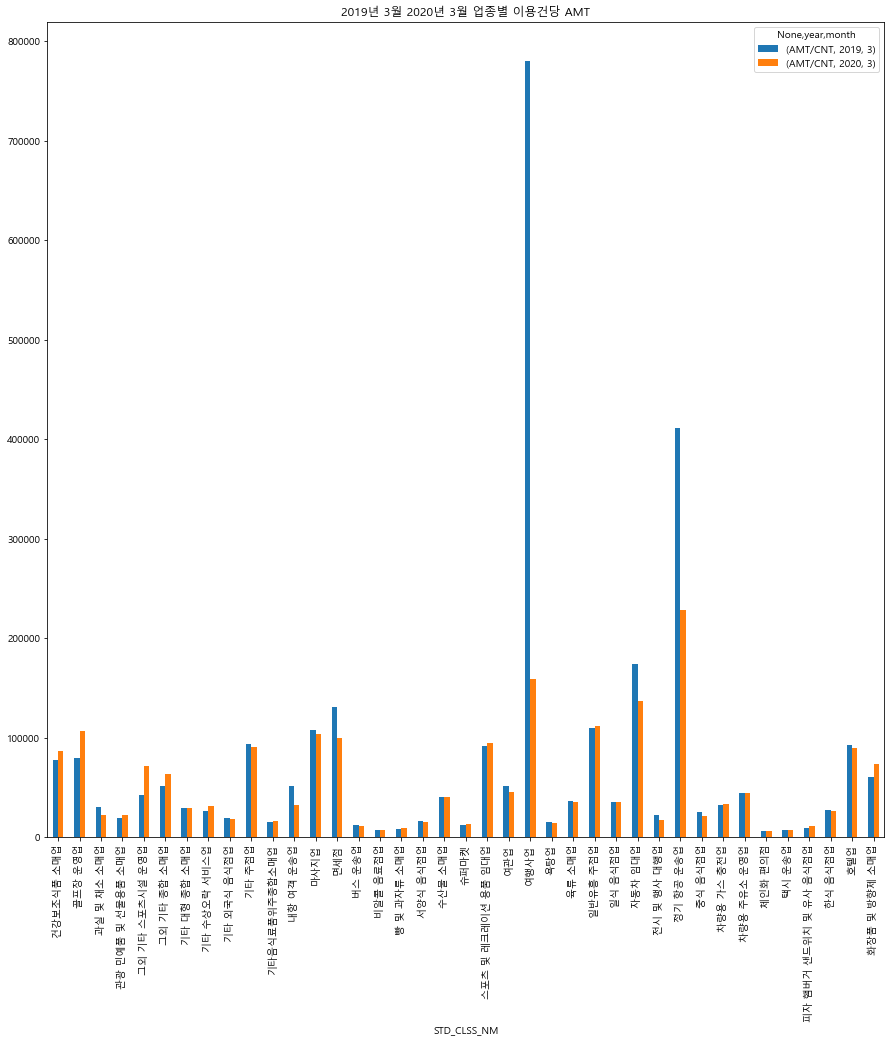

In [39]:
barChar(seoul_pivot)

# 울산

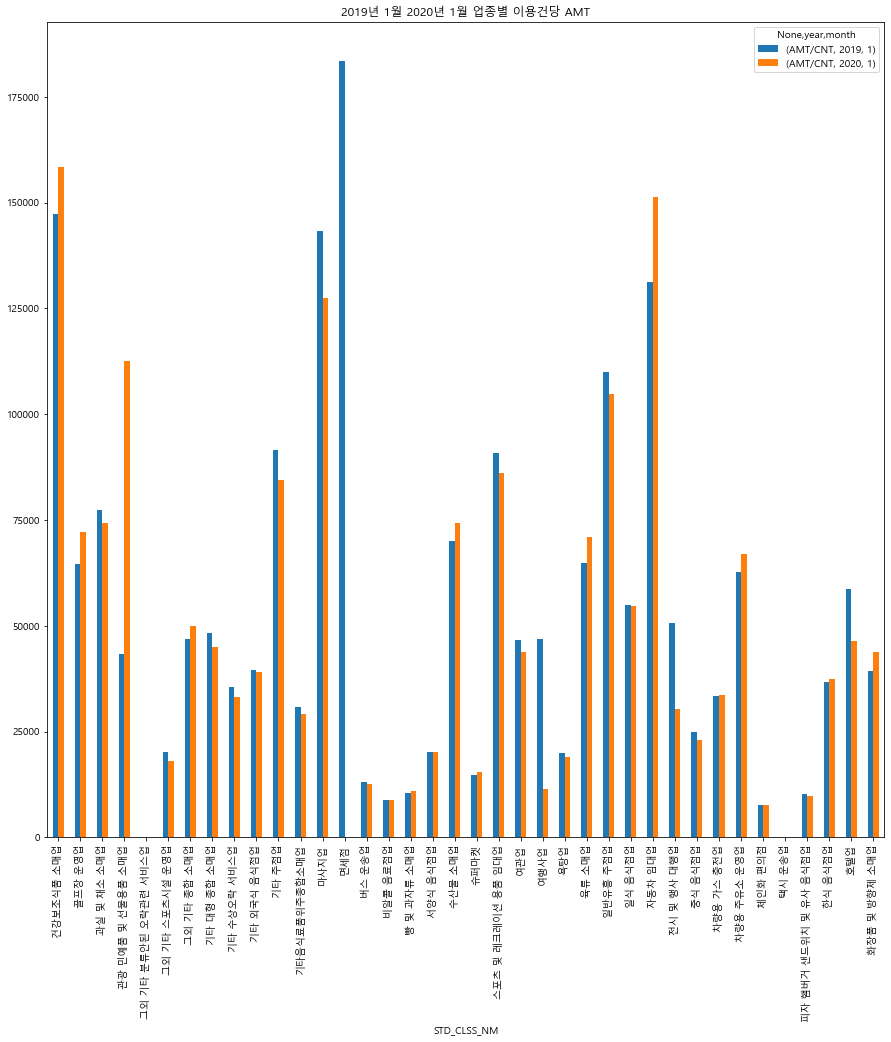

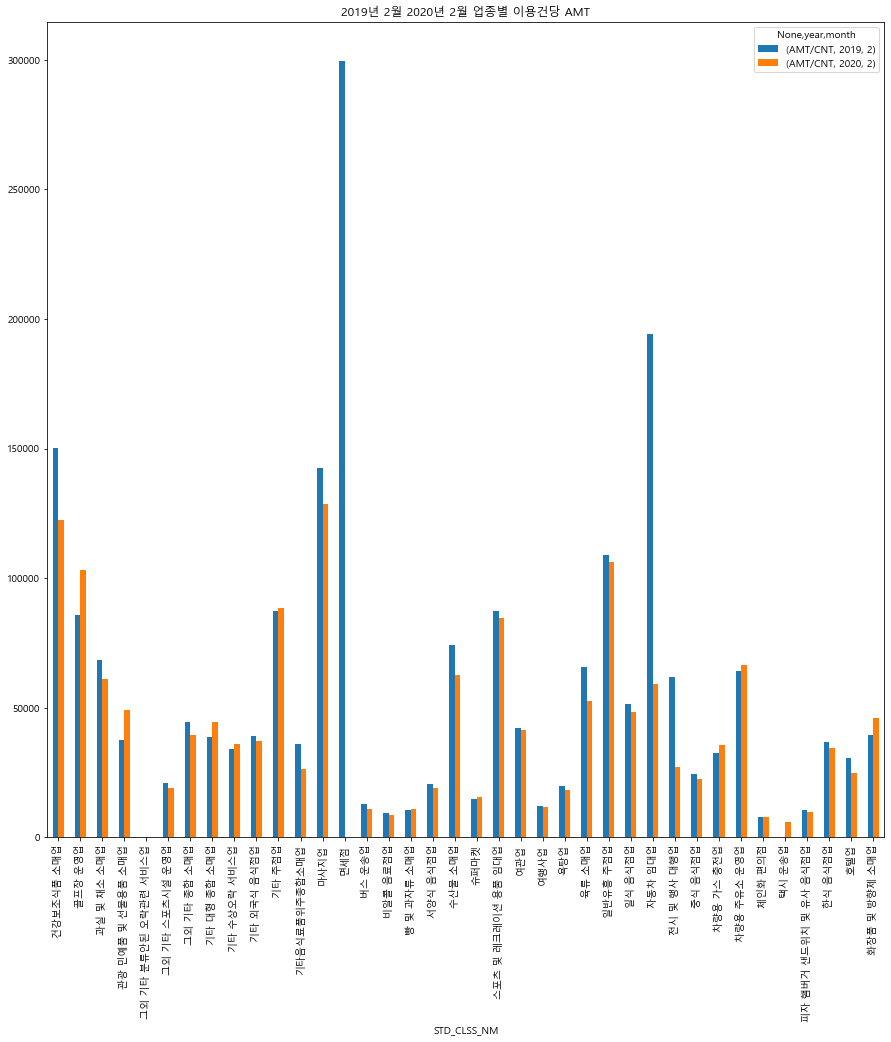

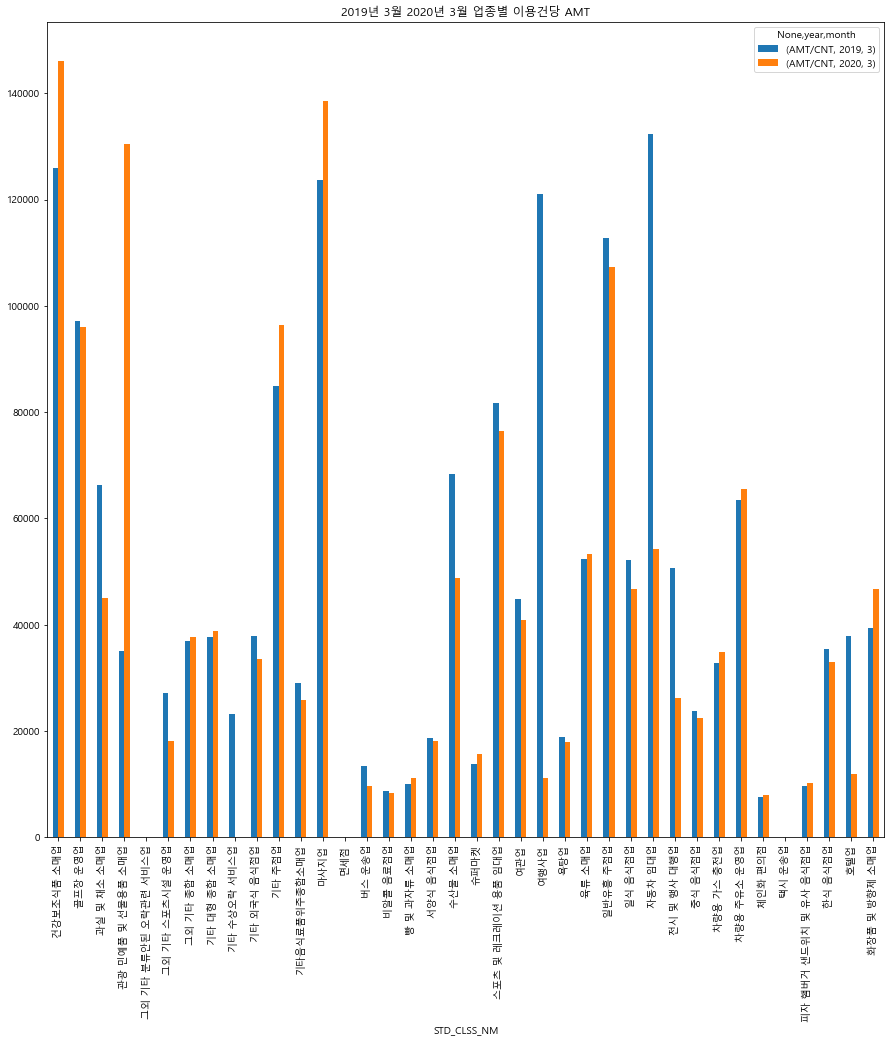

In [40]:
barChar(ulsan_pivot)